In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

plt.rcParams['font.family'] = 'Malgun Gothic'
warnings.filterwarnings('ignore')

df_info_org = pd.read_csv('./data/big_data_set1_f.csv', encoding='cp949')
df_sales_org = pd.read_csv('./data/big_data_set2_f.csv', encoding='cp949')
df_customer_org = pd.read_csv('./data/big_data_set3_f.csv', encoding='cp949')

df_info = pd.read_csv('./data/df_info1.csv', encoding='utf-8-sig')
df_sales = pd.read_csv('./data/df_sales1.csv', encoding='utf-8-sig')
df_customer = pd.read_csv('./data/df_customer1.csv', encoding='utf-8-sig')

In [2]:
df_info['도로명'] = df_info['가맹점주소'].str.split().str[0]
df_info['도로명'] = df_info['도로명'].str.replace(r'\d.*', '', regex=True)

df_info.rename(columns={'가맹점주소': '가맹점주소_세부'}, inplace=True)
df_info.rename(columns={'도로명': '가맹점주소'}, inplace=True)

In [3]:
df_info['개설일'] = pd.to_datetime(df_info['개설일'], errors='coerce')
df_info['폐업일'] = pd.to_datetime(df_info['폐업일'], errors='coerce')

In [4]:
df_active_stores = df_info[df_info['폐업일'].isna()].copy()
df_closed_stores = df_info[df_info['폐업일'].notna()].copy()

df_closed_stores['영업개월수'] = (df_closed_stores['폐업일'].dt.year - df_closed_stores['개설일'].dt.year) * 12 + \
                             (df_closed_stores['폐업일'].dt.month - df_closed_stores['개설일'].dt.month)


In [5]:
print(f'영업 중인 가게 수: {len(df_active_stores)}')
print(f'폐업한 가게 수: {len(df_closed_stores)}')

영업 중인 가게 수: 4056
폐업한 가게 수: 127


전체 가맹점 중 폐업 가맹점(127개, 약 3%)의 비율이 현저히 낮은 '데이터 불균형' 상황에서, 의미 있는 폐업 패턴을 찾아야 하는 것이 핵심

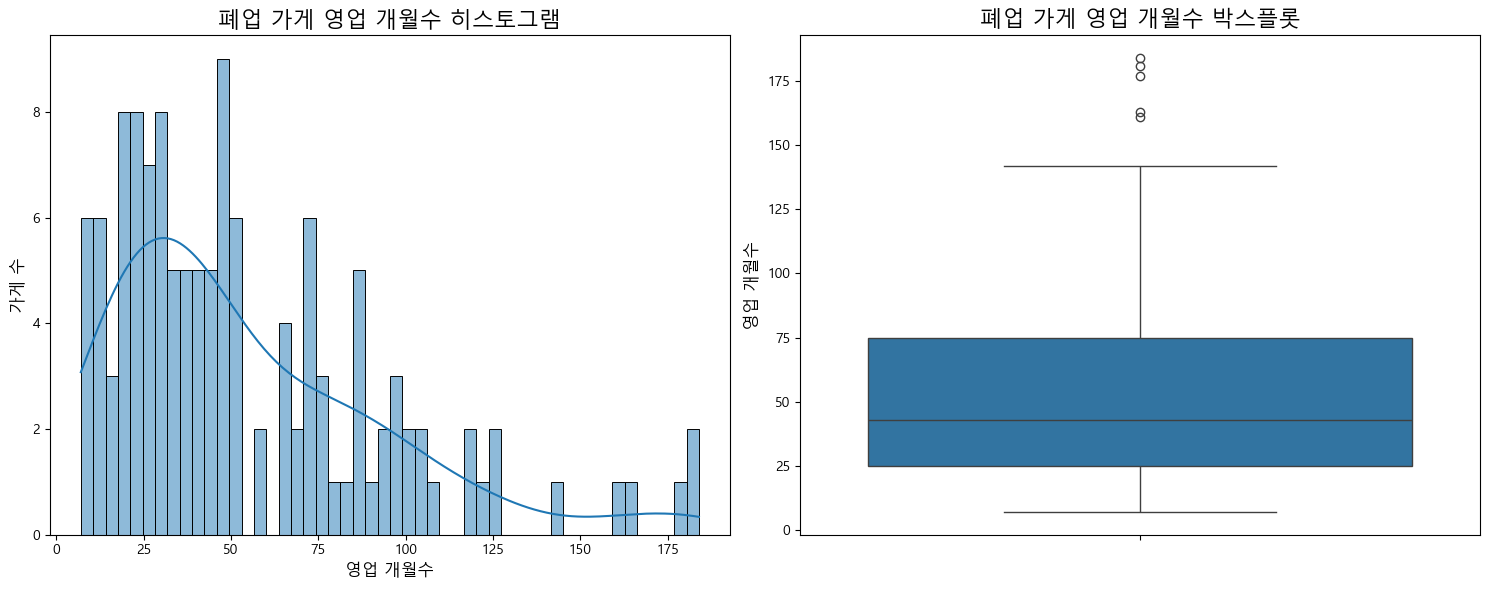

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 첫 번째 그래프(ax1)에 히스토그램 그리기 (영업개월수 기준)
sns.histplot(data=df_closed_stores, x='영업개월수', kde=True, bins=50, ax=ax1)
ax1.set_title('폐업 가게 영업 개월수 히스토그램', fontsize=16)
ax1.set_xlabel('영업 개월수', fontsize=12)
ax1.set_ylabel('가게 수', fontsize=12)

# 두 번째 그래프(ax2)에 박스플롯 그리기 (영업개월수 기준)
sns.boxplot(data=df_closed_stores, y='영업개월수', ax=ax2)
ax2.set_title('폐업 가게 영업 개월수 박스플롯', fontsize=16)
ax2.set_ylabel('영업 개월수', fontsize=12)

plt.tight_layout()
plt.show()

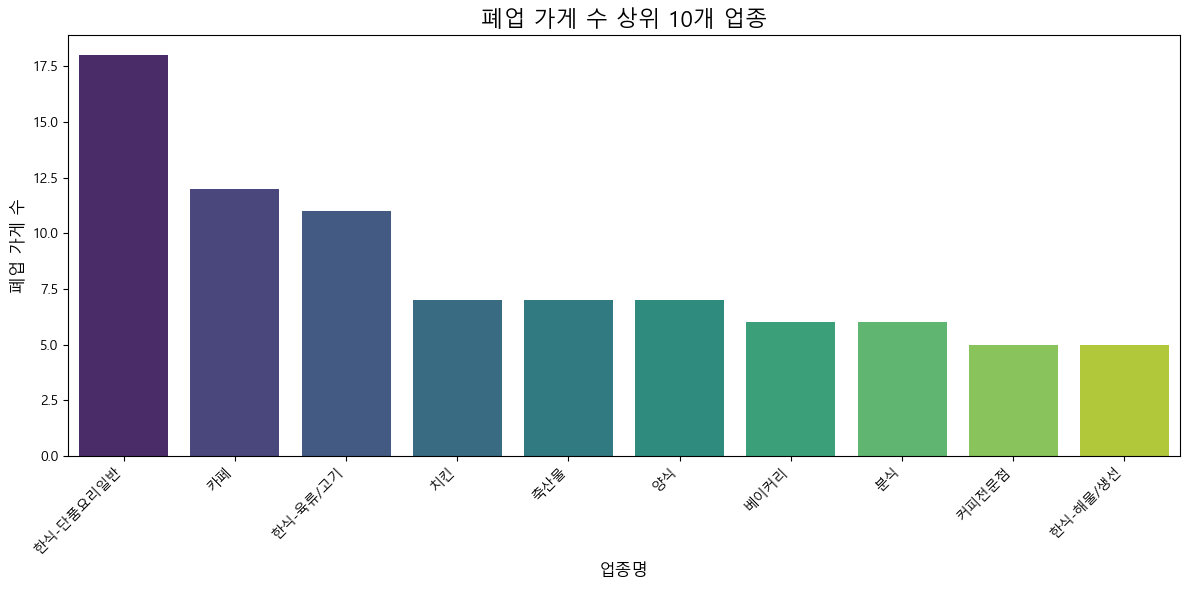

In [7]:
closed_by_type = df_closed_stores['업종'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=closed_by_type.index, y=closed_by_type.values, palette='viridis')
plt.title('폐업 가게 수 상위 10개 업종', fontsize=16)
plt.xlabel('업종명', fontsize=12)
plt.ylabel('폐업 가게 수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

세부 기준을 적용하여 유사한 비즈니스 모델을 가진 업종들을 하나의 그룹으로 통합

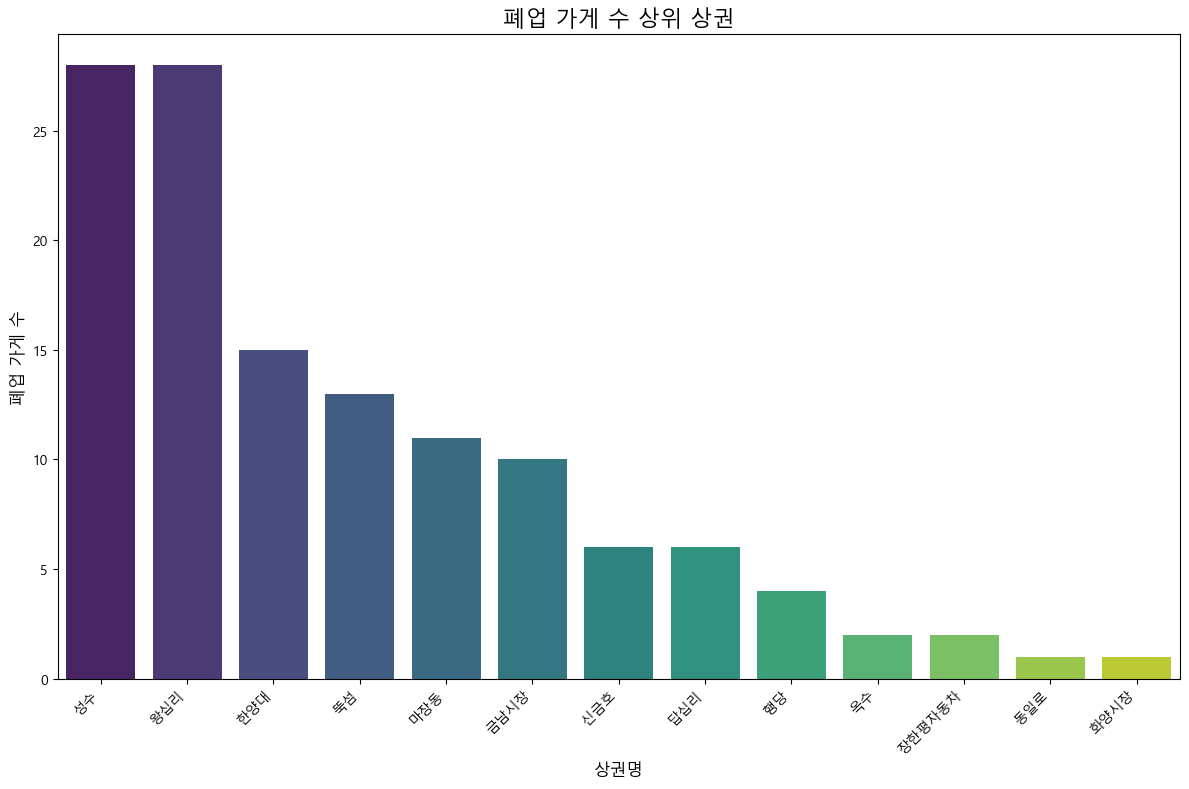

In [8]:
# 상권별 폐업 가게 수 계산
area_counts = df_closed_stores['상권'].value_counts()

# 시각화
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 8))
sns.barplot(x=area_counts.index, y=area_counts.values, palette='viridis')

# 그래프 제목과 라벨 설정
plt.title('폐업 가게 수 상위 상권', fontsize=16)
plt.xlabel('상권명', fontsize=12)
plt.ylabel('폐업 가게 수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

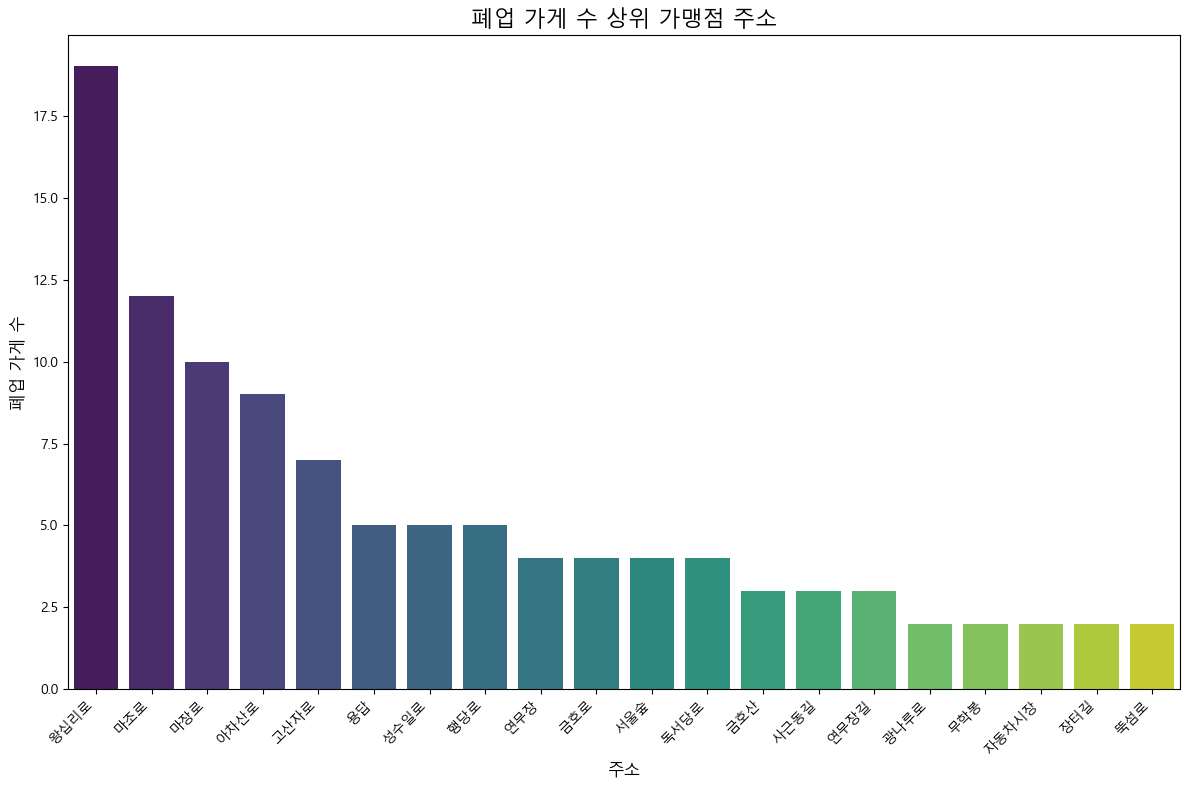

In [9]:
# 상권별 폐업 가게 수 계산
area_counts = df_closed_stores['가맹점주소'].value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=area_counts.index, y=area_counts.values, palette='viridis')

# 그래프 제목과 라벨 설정
plt.title('폐업 가게 수 상위 가맹점 주소', fontsize=16)
plt.xlabel('주소', fontsize=12)
plt.ylabel('폐업 가게 수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [10]:
df_active_sales_data = df_sales[df_sales['가맹점구분번호'].isin(df_active_stores['가맹점구분번호'])]
df_closed_sales_data = df_sales[df_sales['가맹점구분번호'].isin(df_closed_stores['가맹점구분번호'])]

# 두 데이터프레임의 '기준년월'을 datetime 타입으로 변경
df_active_sales_data['기준년월'] = pd.to_datetime(df_active_sales_data['기준년월'])
df_closed_sales_data['기준년월'] = pd.to_datetime(df_closed_sales_data['기준년월'])

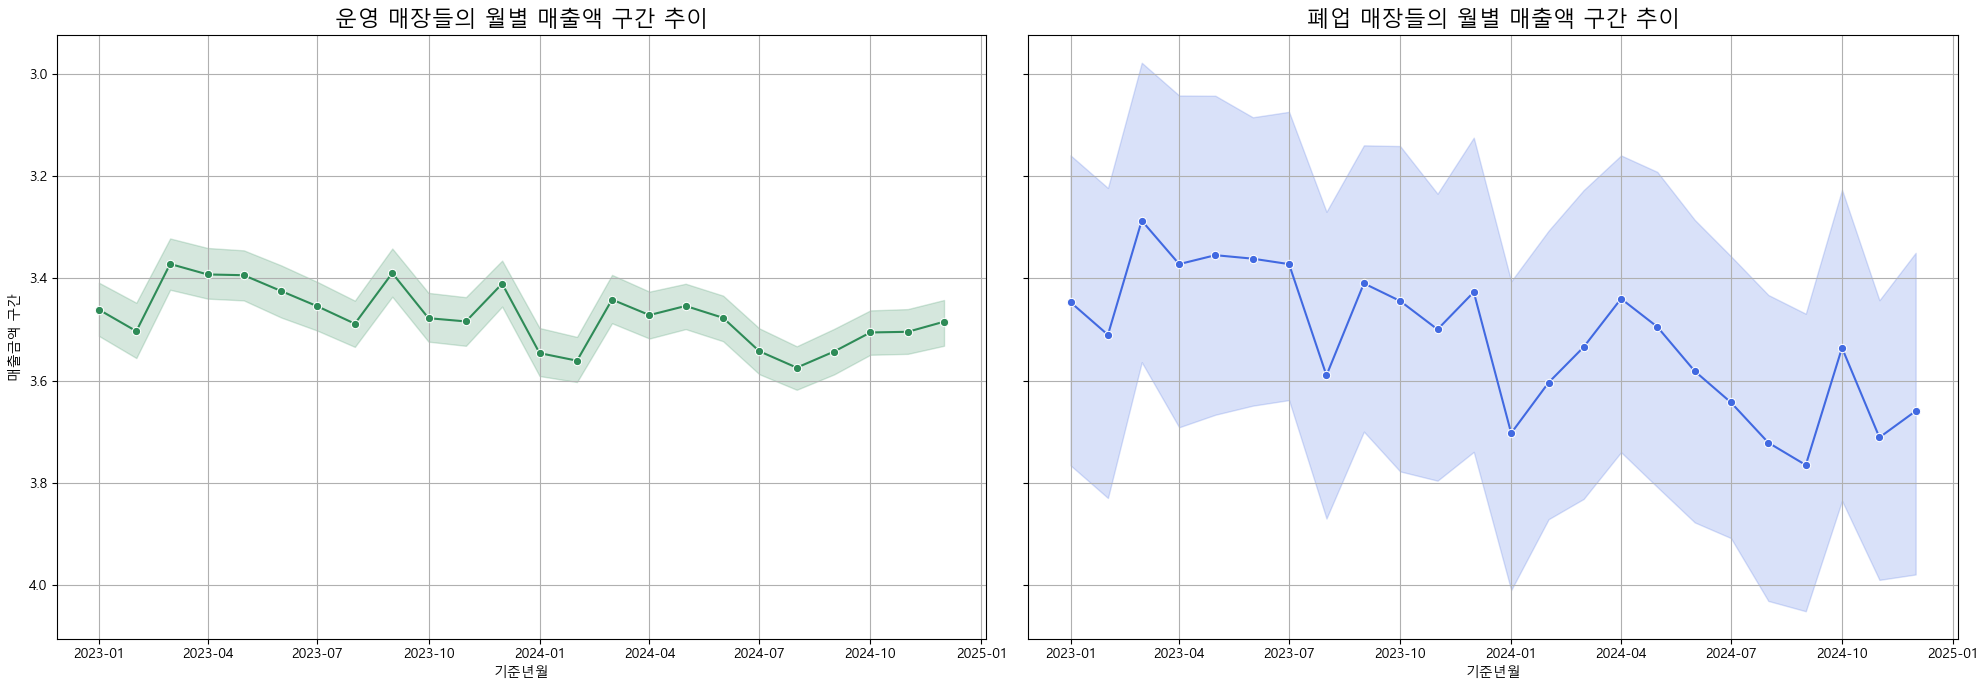

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

# 운영 매장
sns.lineplot(data=df_active_sales_data, x='기준년월', y='매출금액 구간', 
             ax=axes[0], color='seagreen', errorbar=('ci', 95), marker='o')
axes[0].set_title('운영 매장들의 월별 매출액 구간 추이', fontsize=16)
axes[0].grid(True)

# 폐업 매장
sns.lineplot(data=df_closed_sales_data, x='기준년월', y='매출금액 구간', 
             ax=axes[1], color='royalblue', errorbar=('ci', 95), marker='o')
axes[1].set_title('폐업 매장들의 월별 매출액 구간 추이', fontsize=16)
axes[1].grid(True)

axes[0].invert_yaxis()
plt.tight_layout()
plt.show()

폐업한 가게들은 가게들만다 편차가 큼 -> 개별 분석 필요  
왜 매출의 급락 변동이 클까?

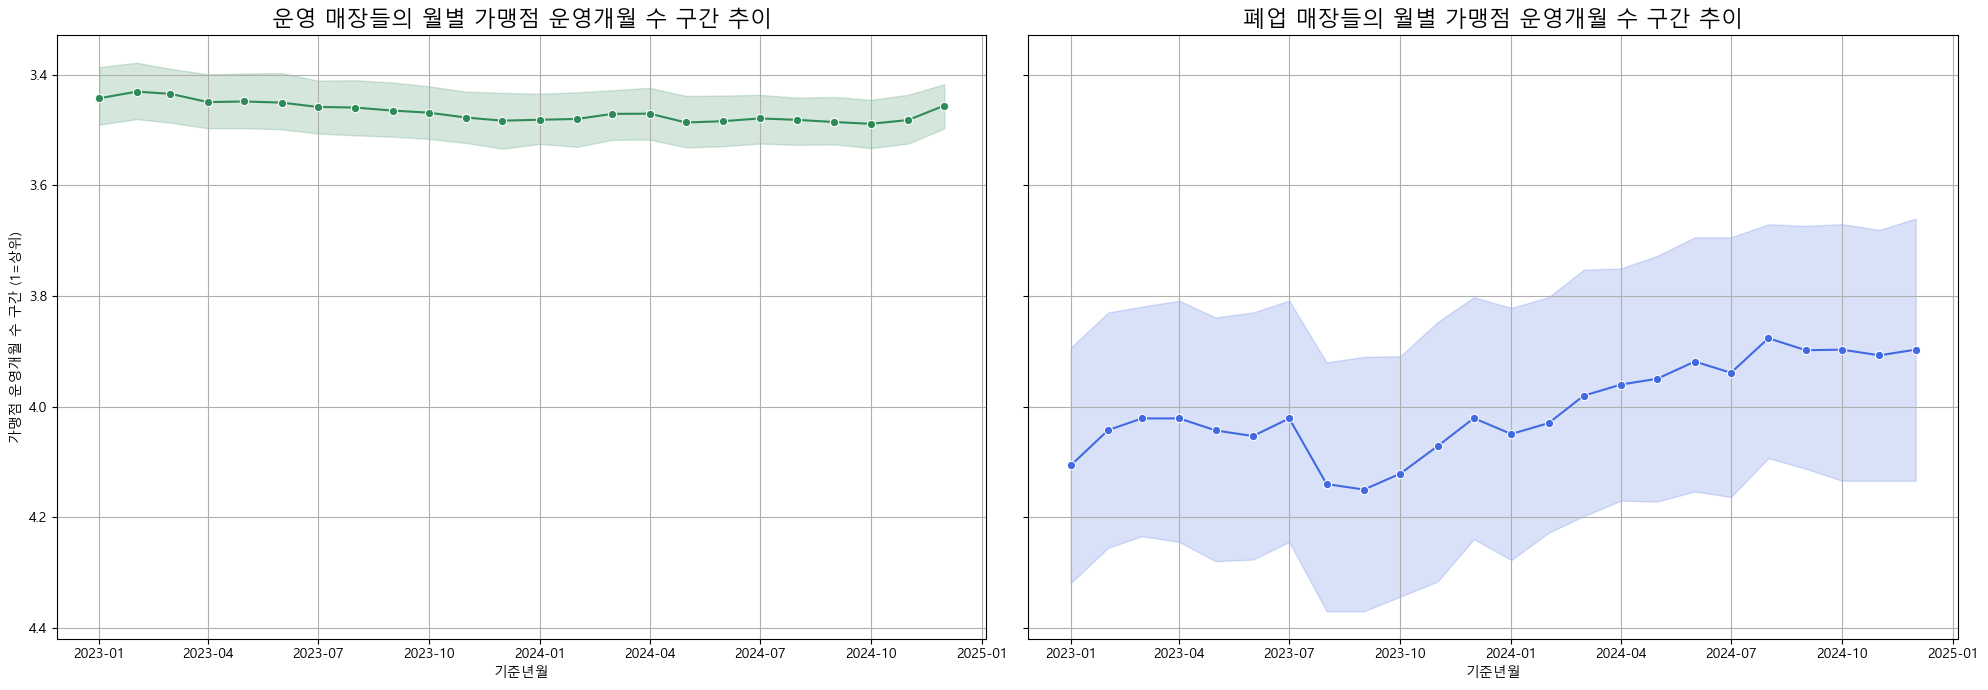

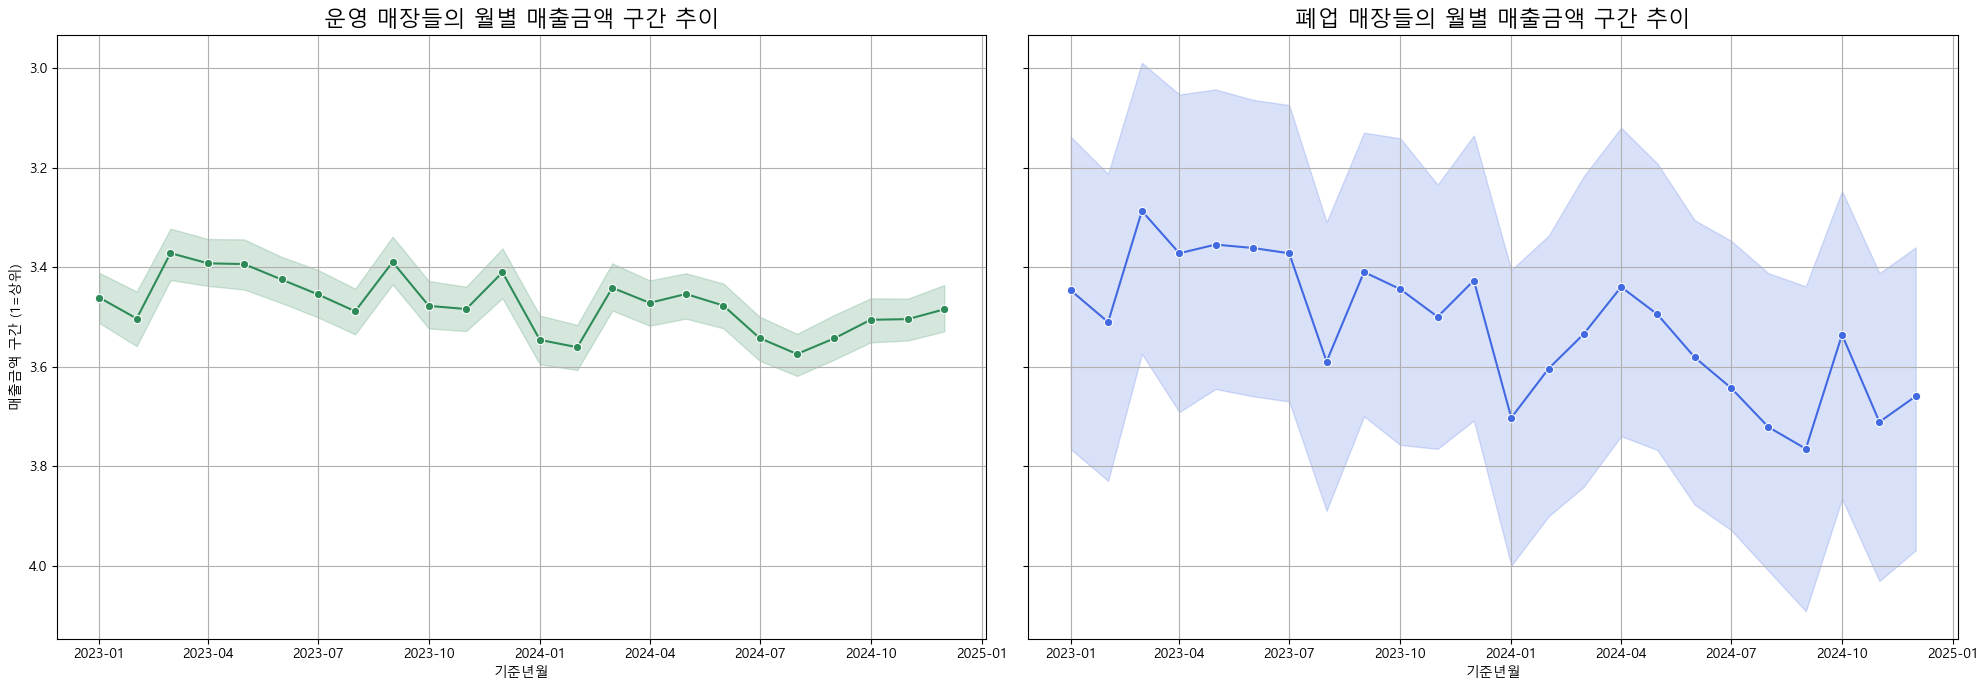

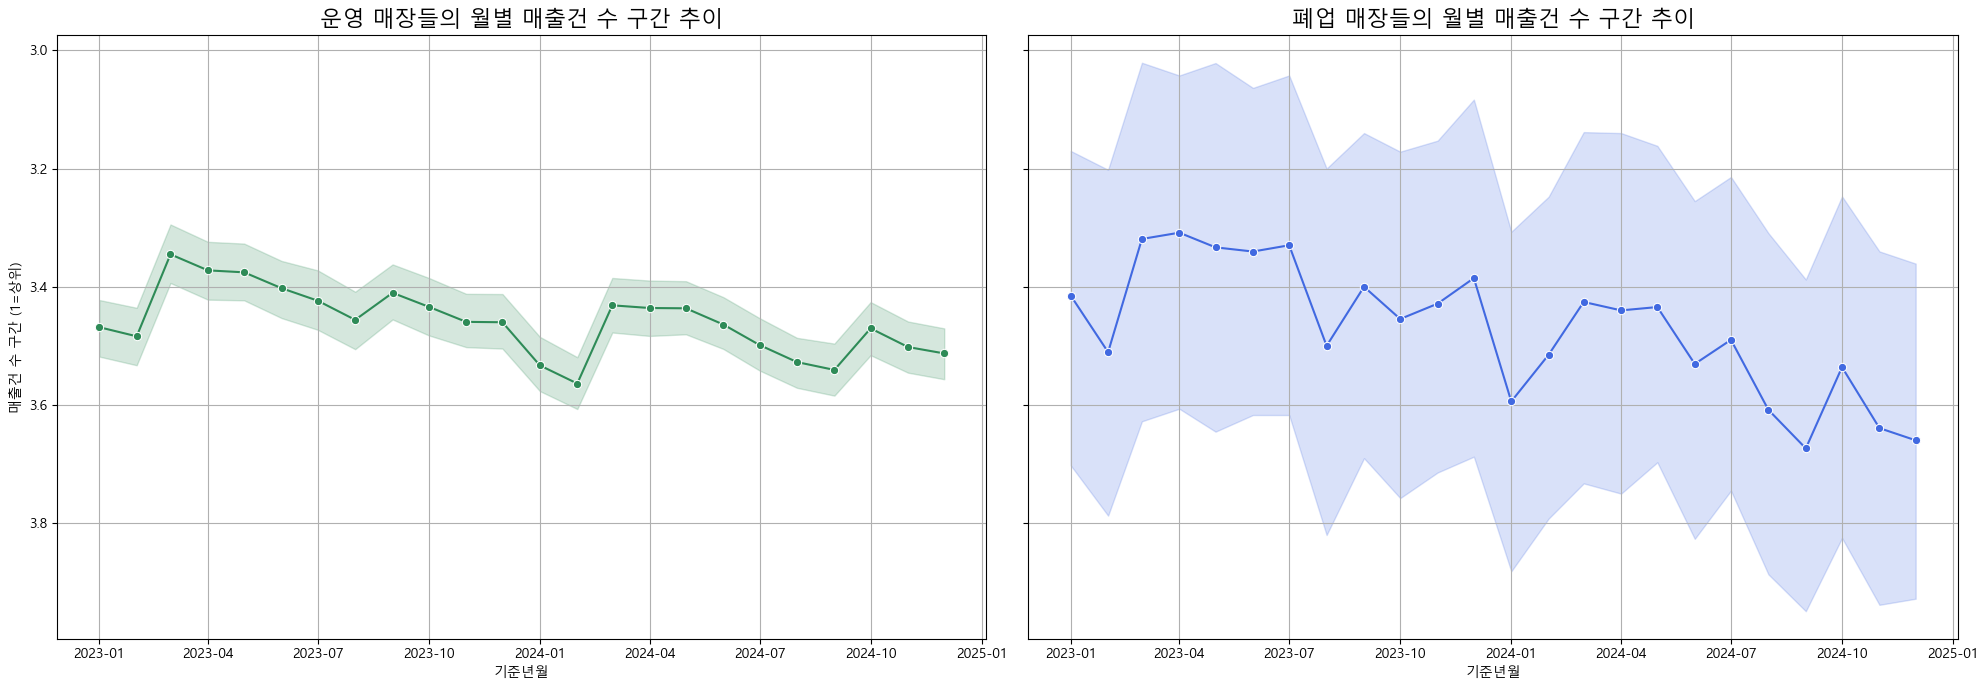

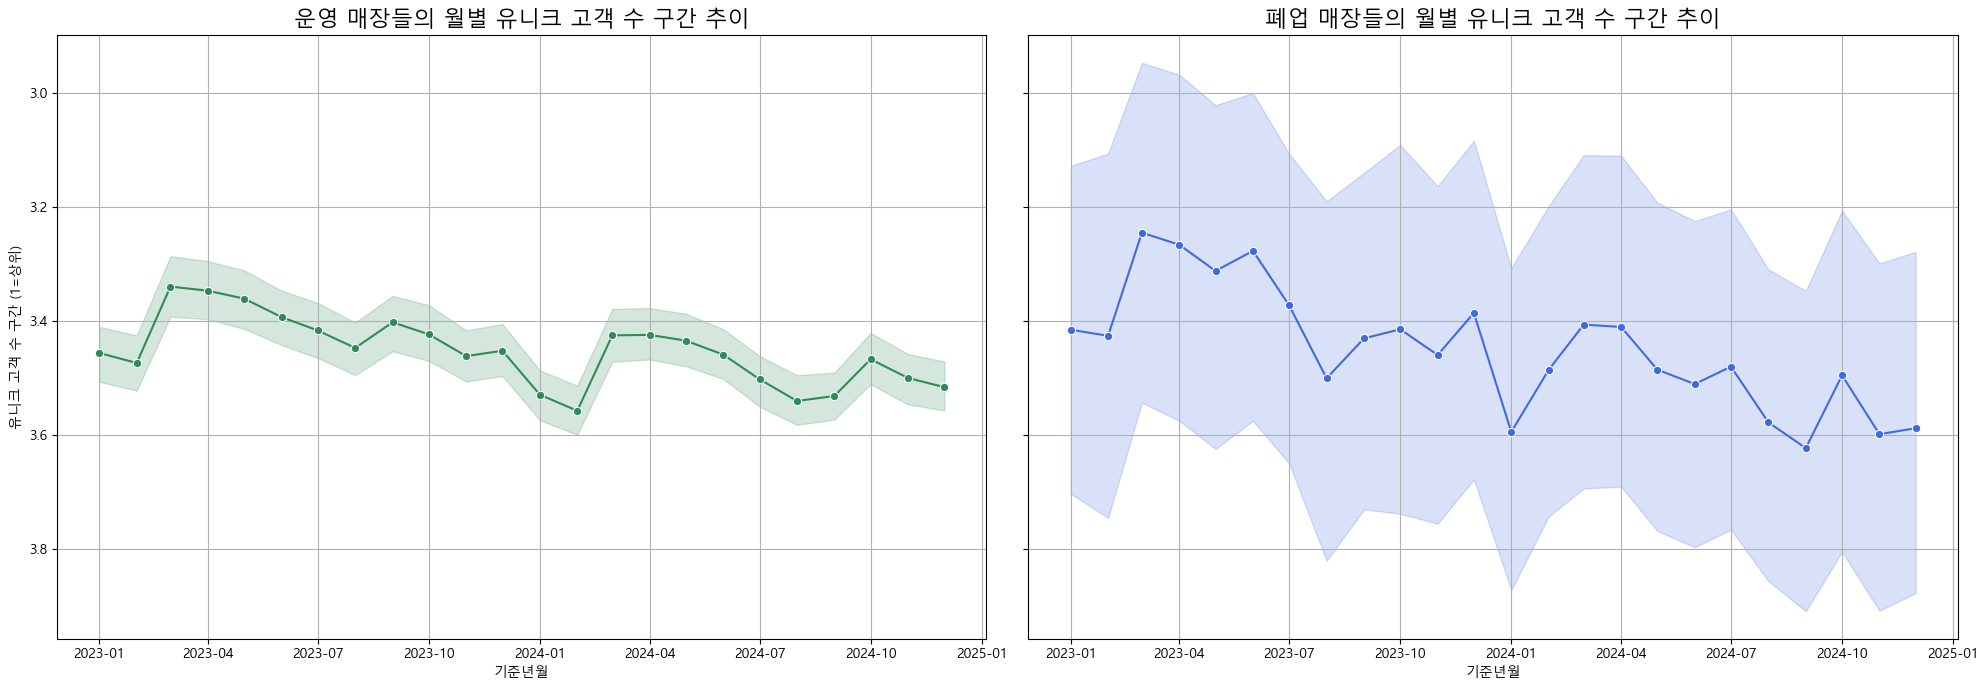

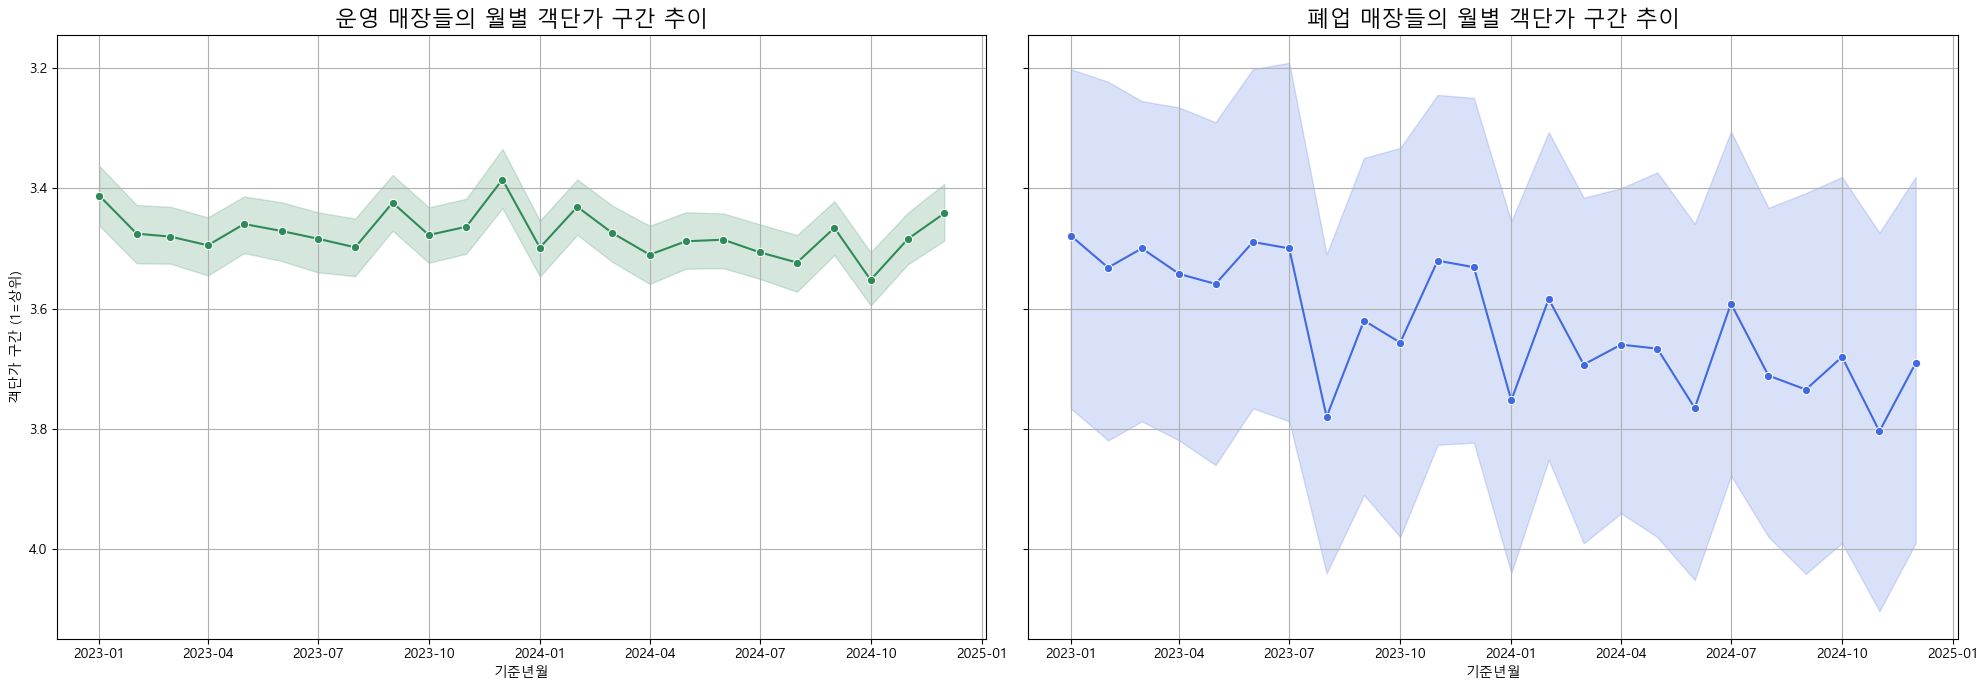

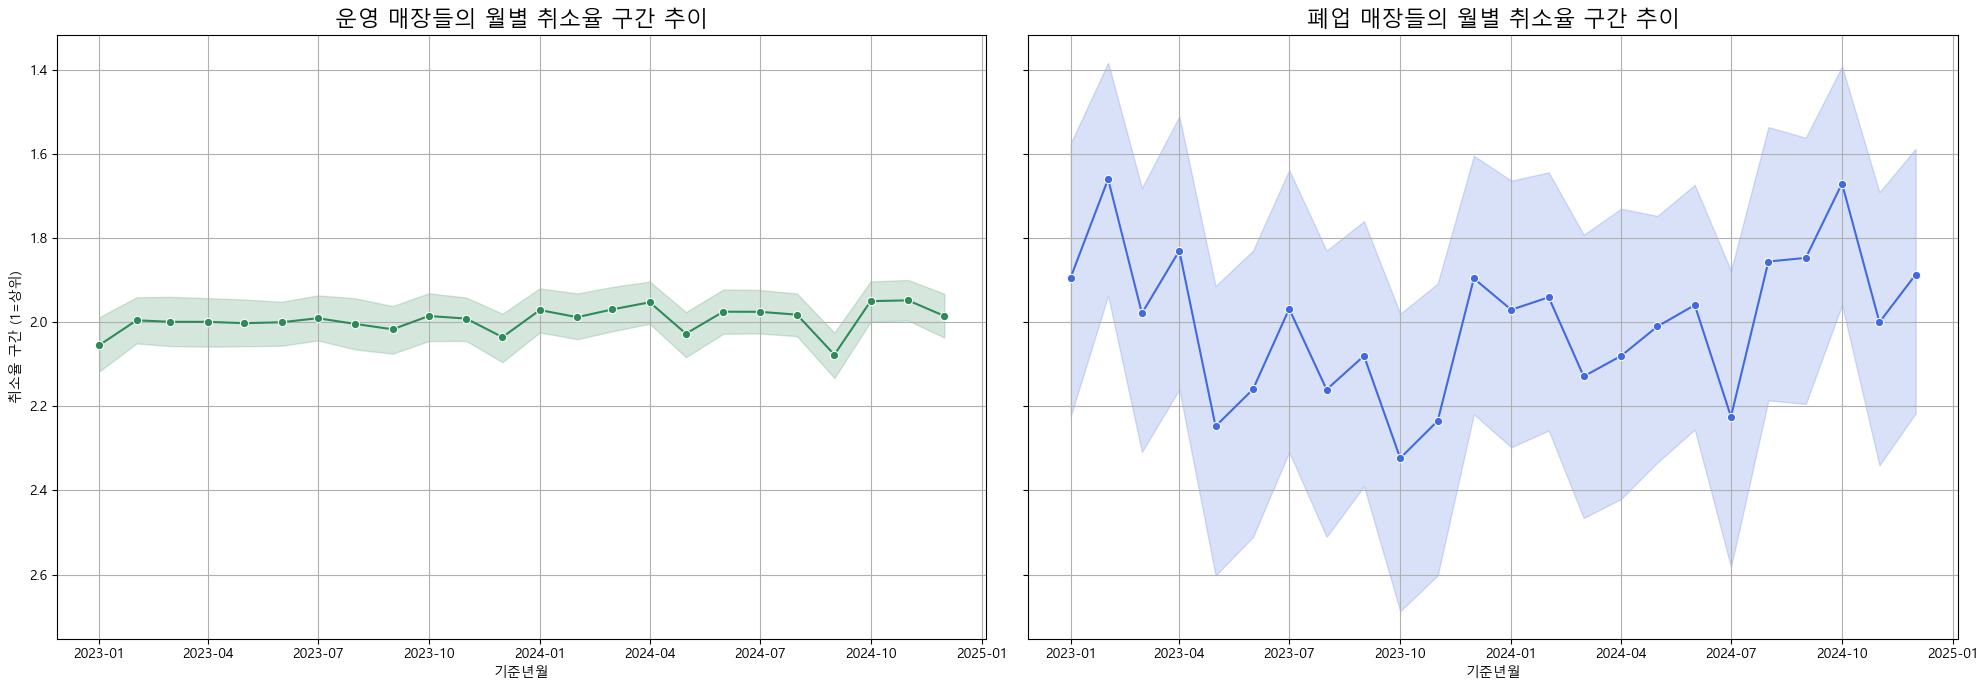

In [12]:
columns_to_process = [
    '가맹점 운영개월 수 구간',
    '매출금액 구간',
    '매출건 수 구간',
    '유니크 고객 수 구간',
    '객단가 구간',
    '취소율 구간'
]

# for 반복문을 사용해서 목록에 있는 각 컬럼(col)에 대해 그래프 그리기
for col in columns_to_process:
    fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
    
    # --- 운영 매장 그래프 ---
    sns.lineplot(data=df_active_sales_data, x='기준년월', y=col, 
                 ax=axes[0], color='seagreen', errorbar=('ci', 95), marker='o')
    axes[0].set_title(f'운영 매장들의 월별 {col} 추이', fontsize=16)
    axes[0].grid(True)
    axes[0].set_ylabel(f'{col} (1=상위)') # Y축 라벨 설정

    # --- 폐업 매장 그래프 ---
    sns.lineplot(data=df_closed_sales_data, x='기준년월', y=col, 
                 ax=axes[1], color='royalblue', errorbar=('ci', 95), marker='o')
    axes[1].set_title(f'폐업 매장들의 월별 {col} 추이', fontsize=16)
    axes[1].grid(True)
    axes[1].set_ylabel('') # 오른쪽 Y축 라벨은 비움

    # Y축 반전 (숫자가 낮을수록 좋은 지표이므로)
    axes[0].invert_yaxis()
    
    plt.tight_layout()
    plt.show()

폐업 매장은 폭이 매우 크고 변화의 기울기가 매우큼 -> 매장마다 상세한 분석이 필요

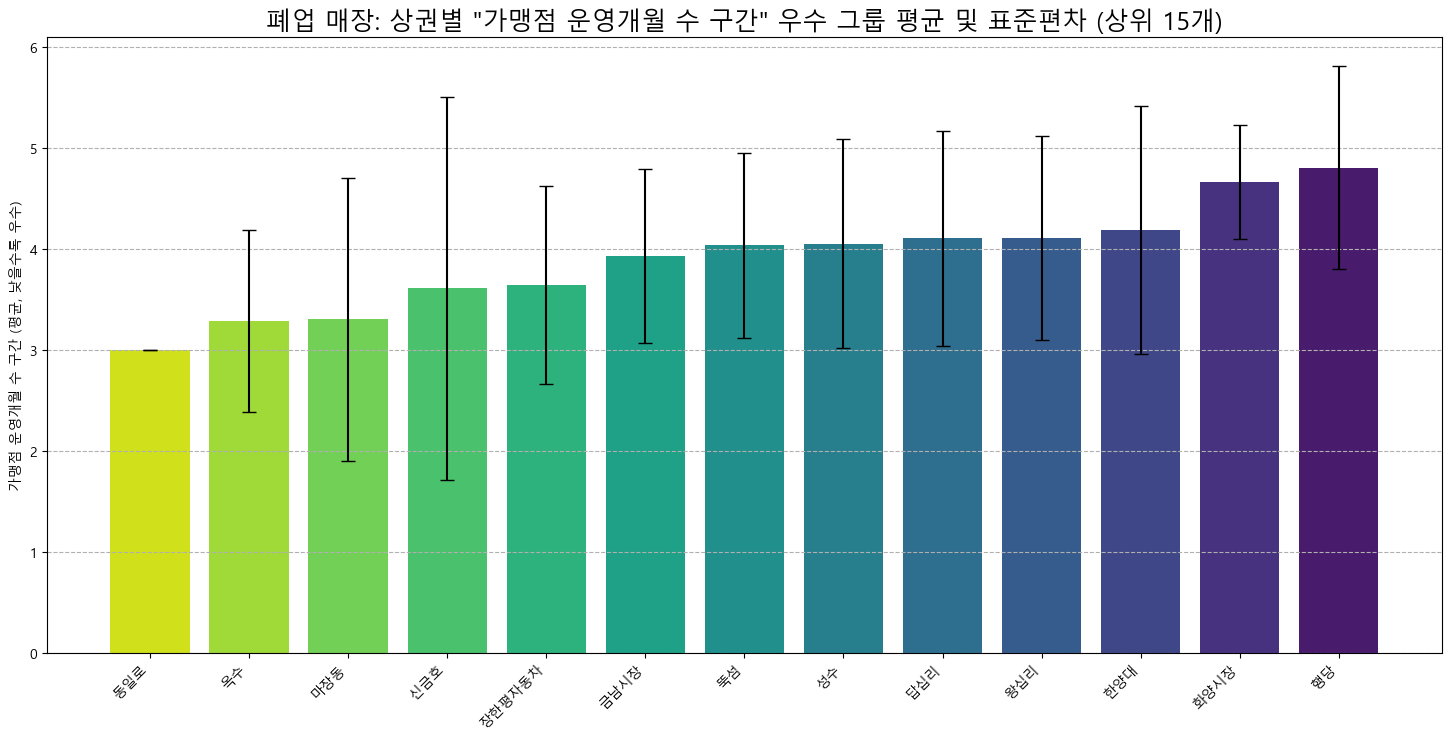

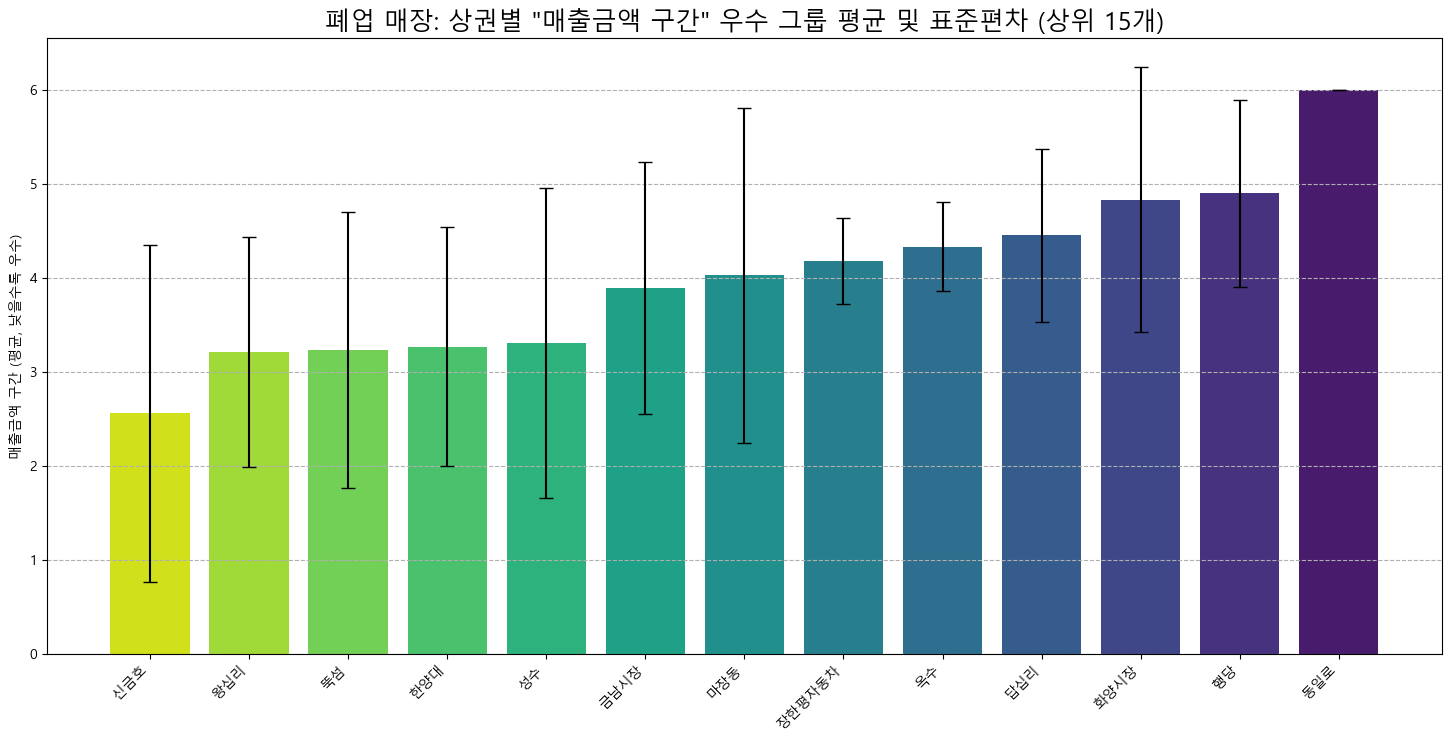

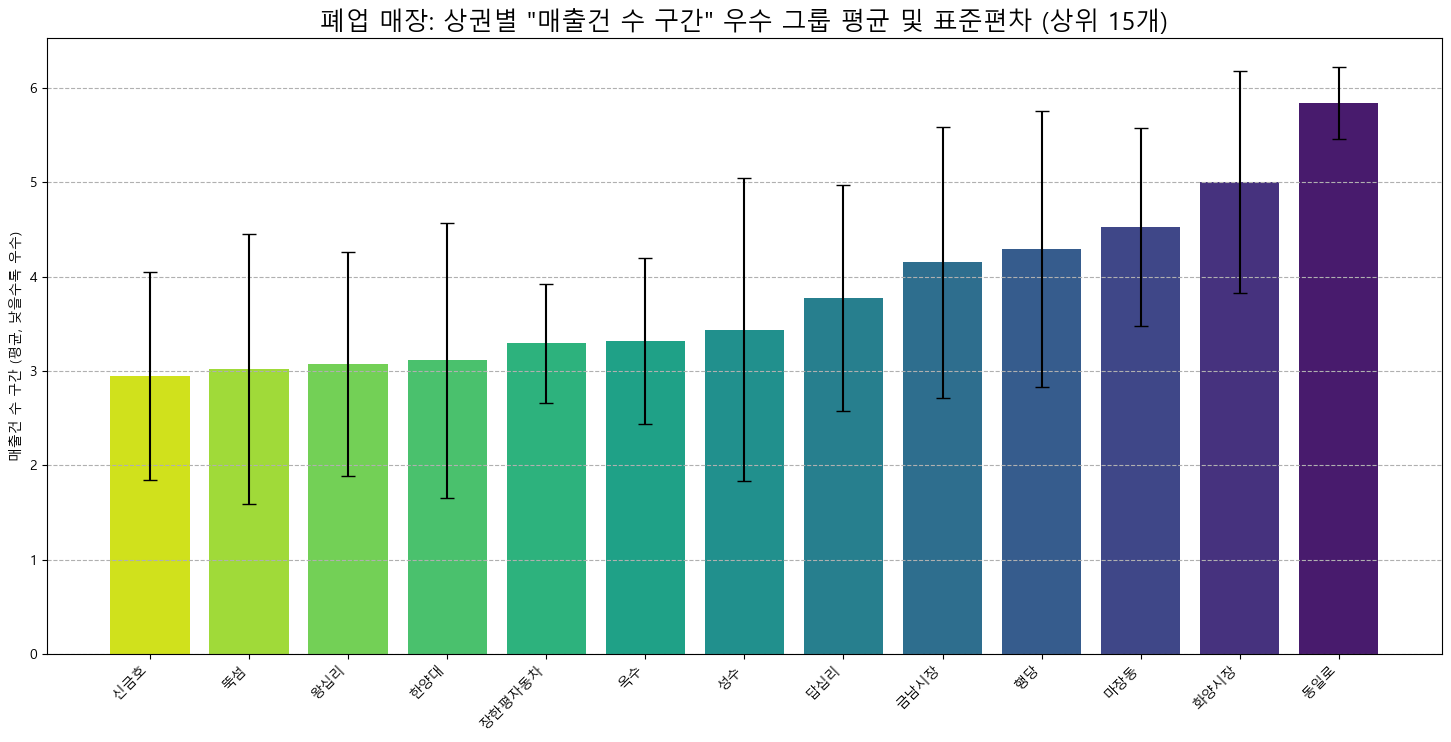

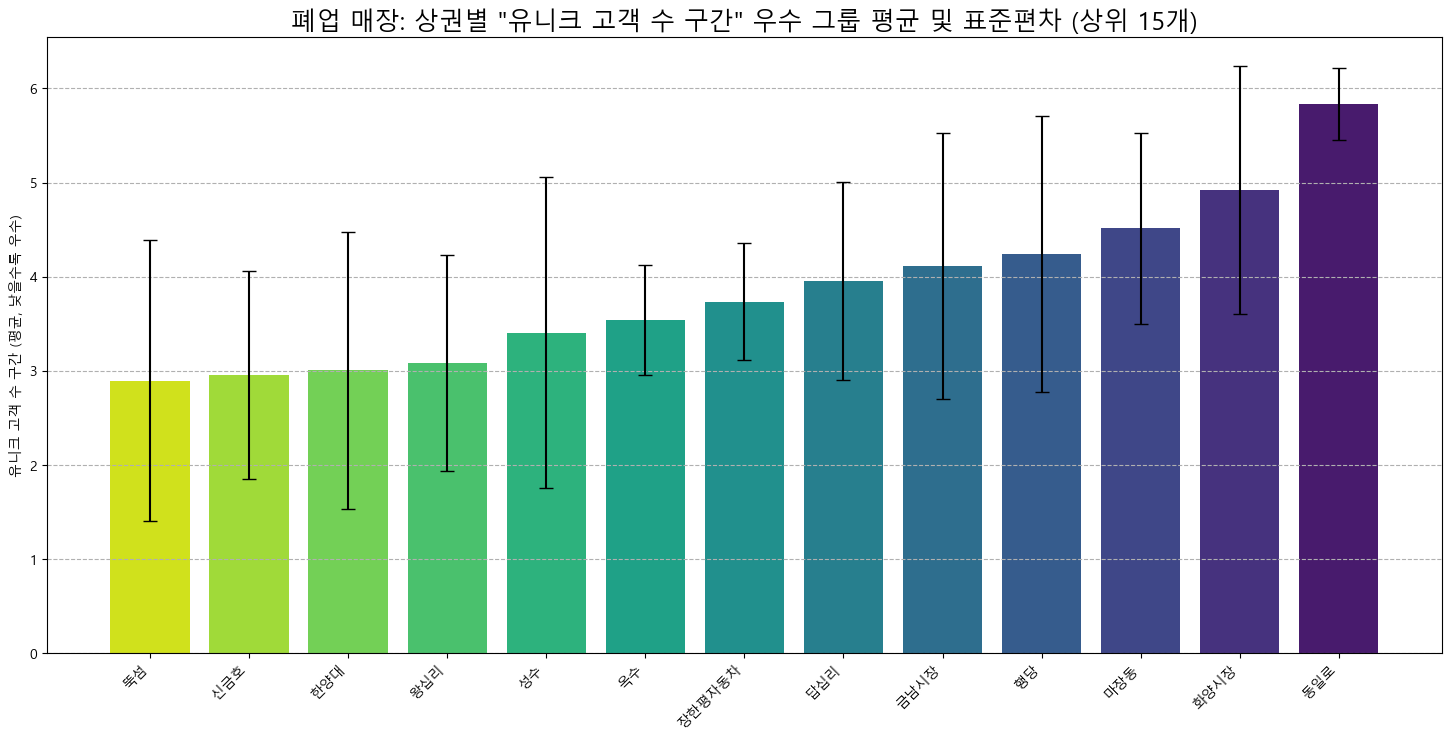

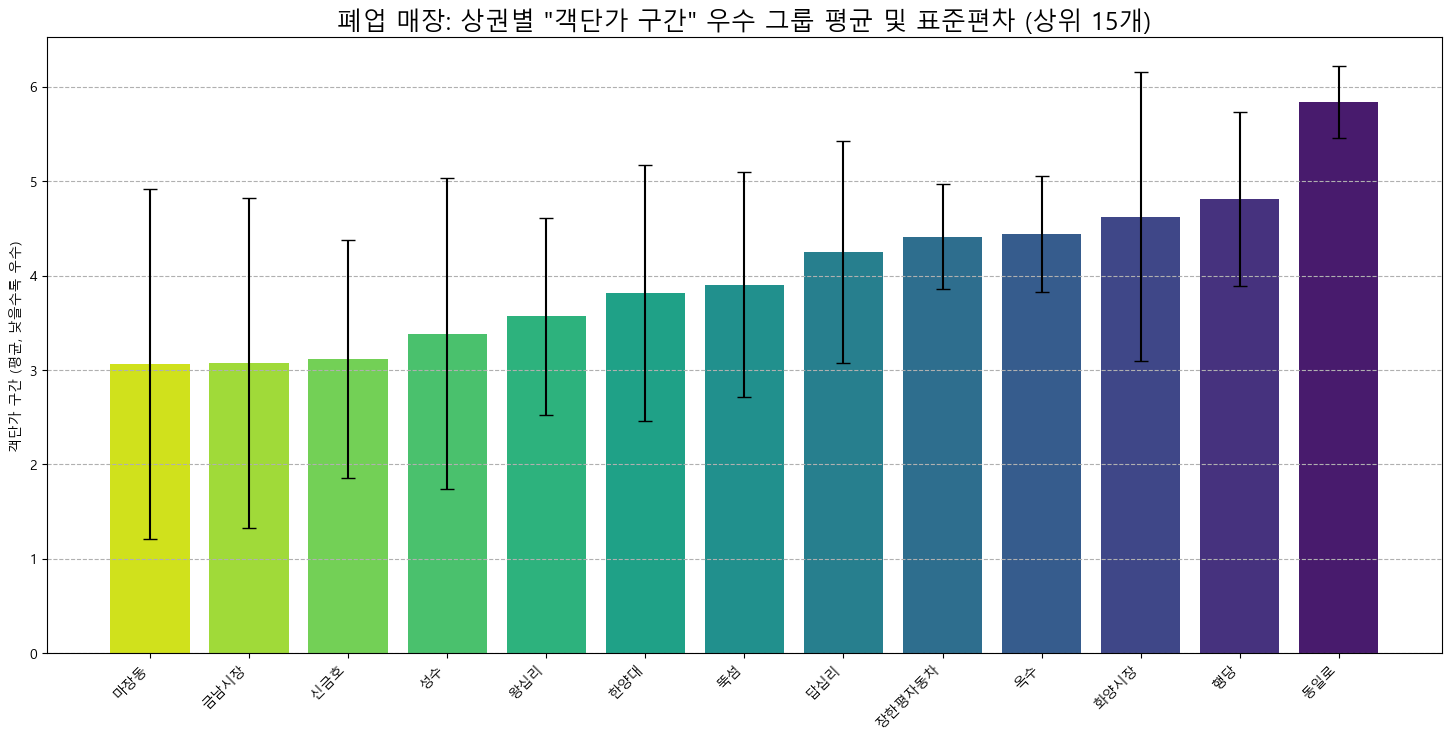

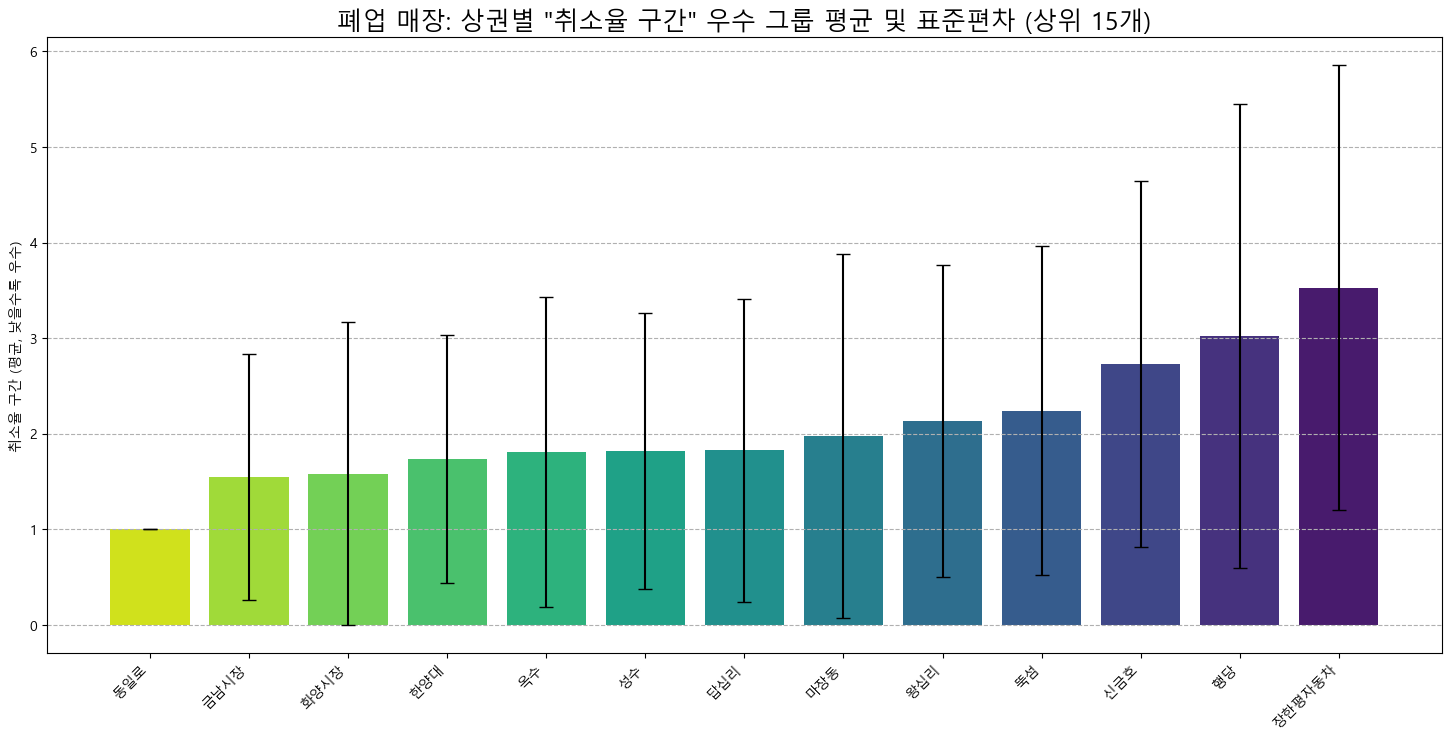

In [13]:
df_closed_merged = pd.merge(df_closed_sales_data, df_info, on='가맹점구분번호')

columns_to_process = [
    '가맹점 운영개월 수 구간',
    '매출금액 구간',
    '매출건 수 구간',
    '유니크 고객 수 구간',
    '객단가 구간',
    '취소율 구간'
]
# '가맹점주소_세부'는 그룹이 너무 많아 시각화 의미가 적으므로 제외
grouping_levels = ['상권']


# --- 1. 시각화 ---
for level in grouping_levels:
    summary = df_closed_merged.groupby(level)[columns_to_process].agg(['mean', 'std', 'count'])
    
    for metric in columns_to_process:
        metric_summary = summary[metric]
        
        # ascending=True로 변경하여 평균(mean)이 '낮은' 순서대로 상위 15개를 정렬
        metric_summary_sorted = metric_summary[metric_summary['count'] >= 10].sort_values('mean', ascending=True).head(15)
        
        if metric_summary_sorted.empty:
            continue

        plt.figure(figsize=(18, 8))
        plt.bar(
            x=metric_summary_sorted.index,
            height=metric_summary_sorted['mean'],
            yerr=metric_summary_sorted['std'],
            capsize=5,
            color=sns.color_palette('viridis_r', len(metric_summary_sorted)) # 색상 팔레트 반전
        )
        
        plt.title(f'폐업 매장: {level}별 "{metric}" 우수 그룹 평균 및 표준편차 (상위 15개)', fontsize=18)
        plt.ylabel(f'{metric} (평균, 낮을수록 우수)')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--')
        plt.show()

매출이 높은데 폐업률이 높은건 외부 요인 있을 것으로 판단 -> 임대료 (외부데이터)

업종에 대한 이유도 있을까?

과도한 초기비용

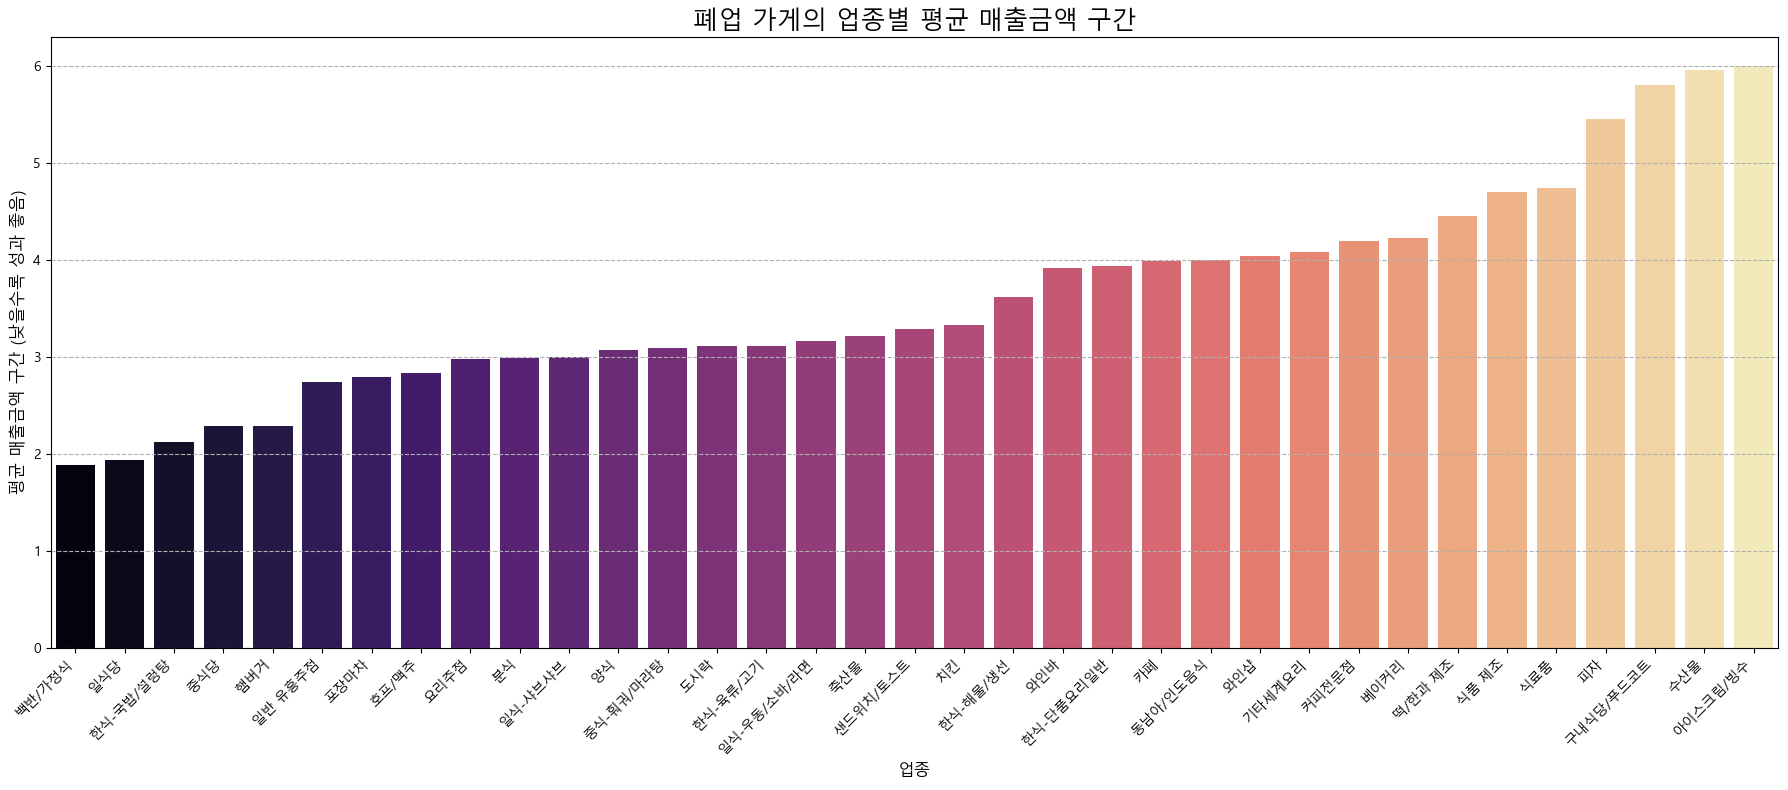

In [14]:
industry_sales_performance = df_closed_merged.groupby('업종')['매출금액 구간'].mean().sort_values(ascending=True)

# --- 2. 시각화 ---
plt.figure(figsize=(18, 8))
sns.barplot(
    x=industry_sales_performance.index, 
    y=industry_sales_performance.values, 
    palette='magma'
)

# 그래프 제목과 라벨 설정
plt.title('폐업 가게의 업종별 평균 매출금액 구간', fontsize=18)
plt.xlabel('업종', fontsize=12)
plt.ylabel('평균 매출금액 구간 (낮을수록 성과 좋음)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

디저트 + 유행에 민감한 업종은 매출이 좋지 않음

업종별로 분류 필요

In [15]:
df_active_customer_data = df_customer[df_customer['가맹점구분번호'].isin(df_active_stores['가맹점구분번호'])]
df_closed_customer_data = df_customer[df_customer['가맹점구분번호'].isin(df_closed_stores['가맹점구분번호'])]

df_closed_customer_merged = pd.merge(df_closed_customer_data, df_info, on='가맹점구분번호')
df_active_customer_merged = pd.merge(df_active_customer_data, df_info, on='가맹점구분번호') # 변수명 오타 수정

df_closed_customer_merged.replace(-999999.9, np.nan, inplace=True)
df_active_customer_merged.replace(-999999.9, np.nan, inplace=True)

# --- 비교 분석을 위한 통합 ---
df_active_customer_merged['구분'] = '운영'
df_closed_customer_merged['구분'] = '폐업'
df_merged = pd.concat([df_active_customer_merged, df_closed_customer_merged])

In [16]:
demo_cols = [
    '남성 20대이하 고객 비중', '남성 30대 고객 비중', '남성 40대 고객 비중',
    '남성 50대 고객 비중', '남성 60대이상 고객 비중',
    '여성 20대이하 고객 비중', '여성 30대 고객 비중', '여성 40대 고객 비중',
    '여성 50대 고객 비중', '여성 60대이상 고객 비중'
]


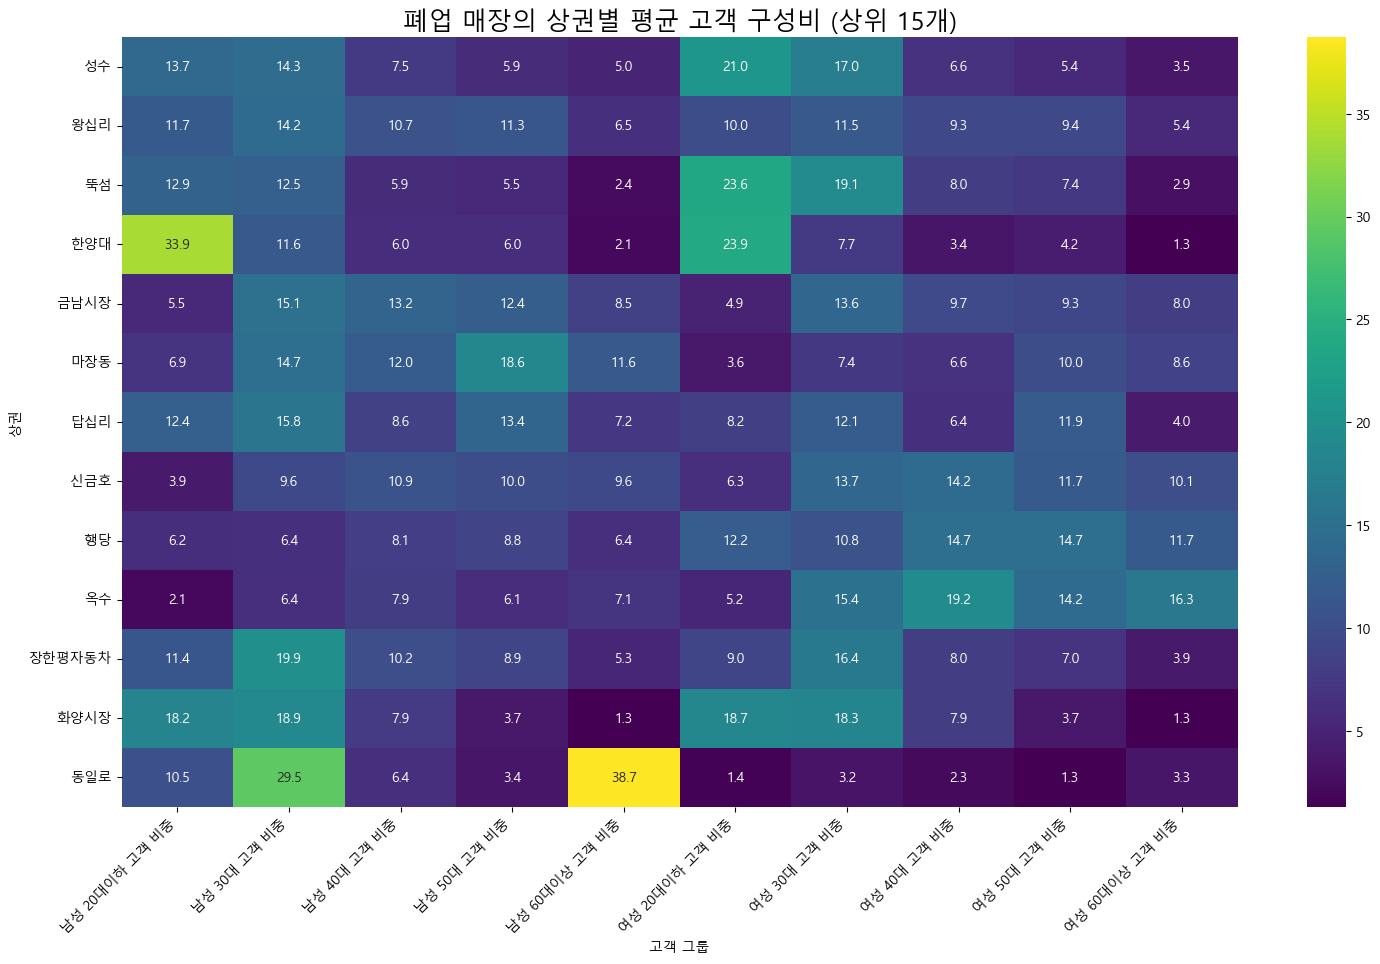

In [17]:

# 분석할 인구통계 컬럼 목록
demo_cols = [
    '남성 20대이하 고객 비중', '남성 30대 고객 비중', '남성 40대 고객 비중',
    '남성 50대 고객 비중', '남성 60대이상 고객 비중',
    '여성 20대이하 고객 비중', '여성 30대 고객 비중', '여성 40대 고객 비중',
    '여성 50대 고객 비중', '여성 60대이상 고객 비중'
]

# --- 1. 데이터 준비: 상권별 평균 고객 비중 계산 ---
# '상권'으로 그룹화하여 각 인구통계 그룹의 평균 비중을 계산
sanggwon_demographics = df_closed_customer_merged.groupby('상권')[demo_cols].mean()

# 폐업 가게 수가 많은 상위 15개 상권만 선택
top_15_sanggwon = df_closed_customer_merged['상권'].value_counts().head(15).index
sanggwon_demographics_top15 = sanggwon_demographics.loc[top_15_sanggwon]


# --- 2. 시각화 (Heatmap) ---
plt.figure(figsize=(18, 10))
sns.heatmap(
    sanggwon_demographics_top15, 
    annot=True,     # 각 칸에 숫자 표시
    fmt='.1f',      # 소수점 첫째 자리까지 표시
    cmap='viridis'  # 색상 스타일
)

plt.title('폐업 매장의 상권별 평균 고객 구성비 (상위 15개)', fontsize=18)
plt.xlabel('고객 그룹')
plt.ylabel('상권')
plt.xticks(rotation=45, ha='right')
plt.show()

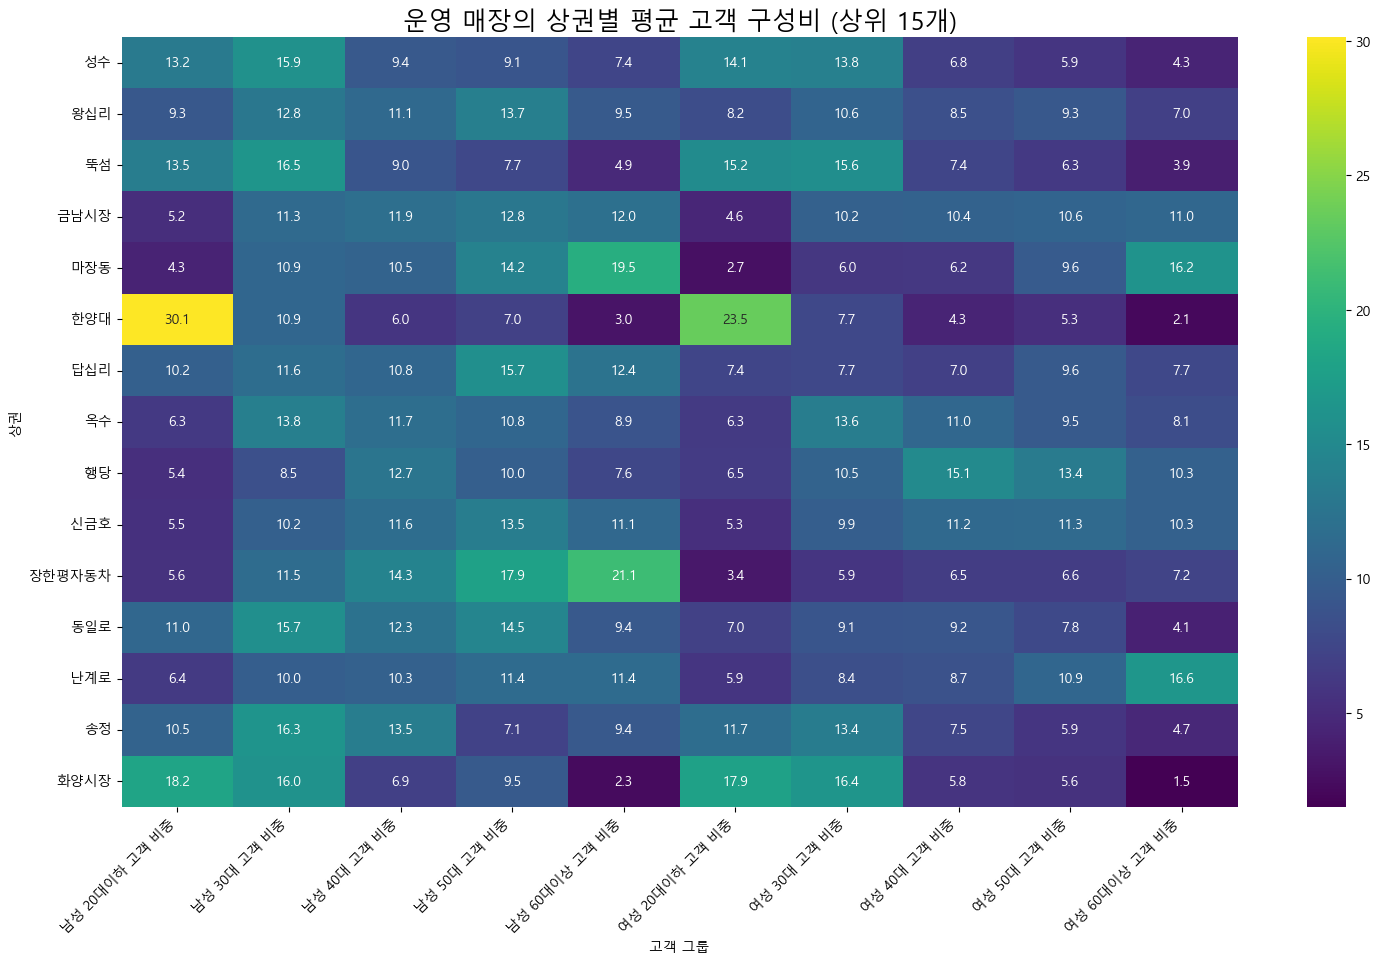

In [18]:
# 분석할 인구통계 컬럼 목록
demo_cols = [
    '남성 20대이하 고객 비중', '남성 30대 고객 비중', '남성 40대 고객 비중',
    '남성 50대 고객 비중', '남성 60대이상 고객 비중',
    '여성 20대이하 고객 비중', '여성 30대 고객 비중', '여성 40대 고객 비중',
    '여성 50대 고객 비중', '여성 60대이상 고객 비중'
]

# --- 1. 데이터 준비: 운영 매장의 상권별 평균 고객 비중 계산 ---
# 'df_active_customer_merged' 데이터프레임을 사용
sanggwon_demographics_active = df_active_customer_merged.groupby('상권')[demo_cols].mean()

# '운영' 가게 수가 많은 상위 15개 상권만 선택
top_15_sanggwon_active = df_active_customer_merged['상권'].value_counts().head(15).index
sanggwon_demographics_top15_active = sanggwon_demographics_active.loc[top_15_sanggwon_active]


# --- 2. 시각화 (Heatmap) ---
plt.figure(figsize=(18, 10))
sns.heatmap(
    sanggwon_demographics_top15_active, 
    annot=True,     # 각 칸에 숫자 표시
    fmt='.1f',      # 소수점 첫째 자리까지 표시
    cmap='viridis'  # 색상 스타일
)

plt.title('운영 매장의 상권별 평균 고객 구성비 (상위 15개)', fontsize=18) # 제목 수정
plt.xlabel('고객 그룹')
plt.ylabel('상권')
plt.xticks(rotation=45, ha='right')
plt.show()


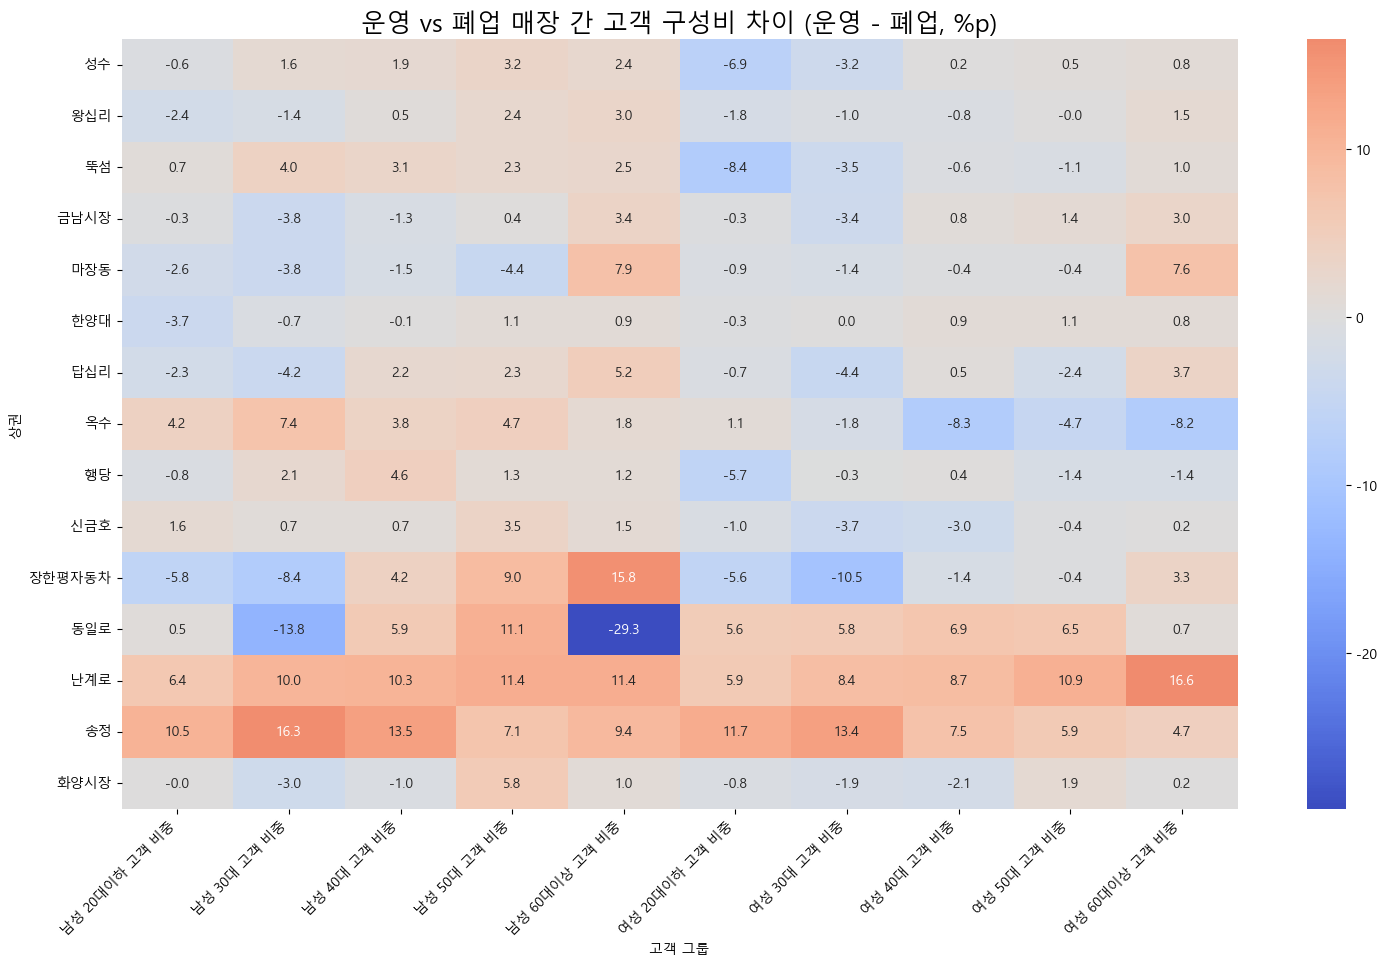

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 및 마이너스 부호 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 분석할 인구통계 컬럼 목록
demo_cols = [
    '남성 20대이하 고객 비중', '남성 30대 고객 비중', '남성 40대 고객 비중',
    '남성 50대 고객 비중', '남성 60대이상 고객 비중',
    '여성 20대이하 고객 비중', '여성 30대 고객 비중', '여성 40대 고객 비중',
    '여성 50대 고객 비중', '여성 60대이상 고객 비중'
]

# --- 1. 그룹별 평균 비중 계산 ---
# 운영 매장
sanggwon_demographics_active = df_active_customer_merged.groupby('상권')[demo_cols].mean()
# 폐업 매장
sanggwon_demographics_closed = df_closed_customer_merged.groupby('상권')[demo_cols].mean()


# --- 2. '운영 - 폐업' 차이 계산 ---
# .subtract를 사용해 두 데이터프레임의 차이를 계산 (같은 상권끼리 빼줌)
diff = sanggwon_demographics_active.subtract(sanggwon_demographics_closed, fill_value=0)

# 분석할 상위 15개 상권 선택 (운영 매장 수가 많은 순)
top_15_sanggwon = df_active_customer_merged['상권'].value_counts().head(15).index
diff_top15 = diff.loc[top_15_sanggwon].dropna()


# --- 3. '차이' 히트맵 시각화 ---
plt.figure(figsize=(18, 10))
sns.heatmap(
    diff_top15, 
    annot=True,     # 각 칸에 숫자(차이값) 표시
    fmt='.1f',      # 소수점 첫째 자리까지 표시
    cmap='coolwarm',# 차이를 보여주기 좋은 컬러맵 (양수는 붉은색, 음수는 푸른색)
    center=0        # 색상의 기준점을 0으로 설정
)

plt.title('운영 vs 폐업 매장 간 고객 구성비 차이 (운영 - 폐업, %p)', fontsize=18)
plt.xlabel('고객 그룹')
plt.ylabel('상권')
plt.xticks(rotation=45, ha='right')
plt.show()

업종 별로도 비교 필요

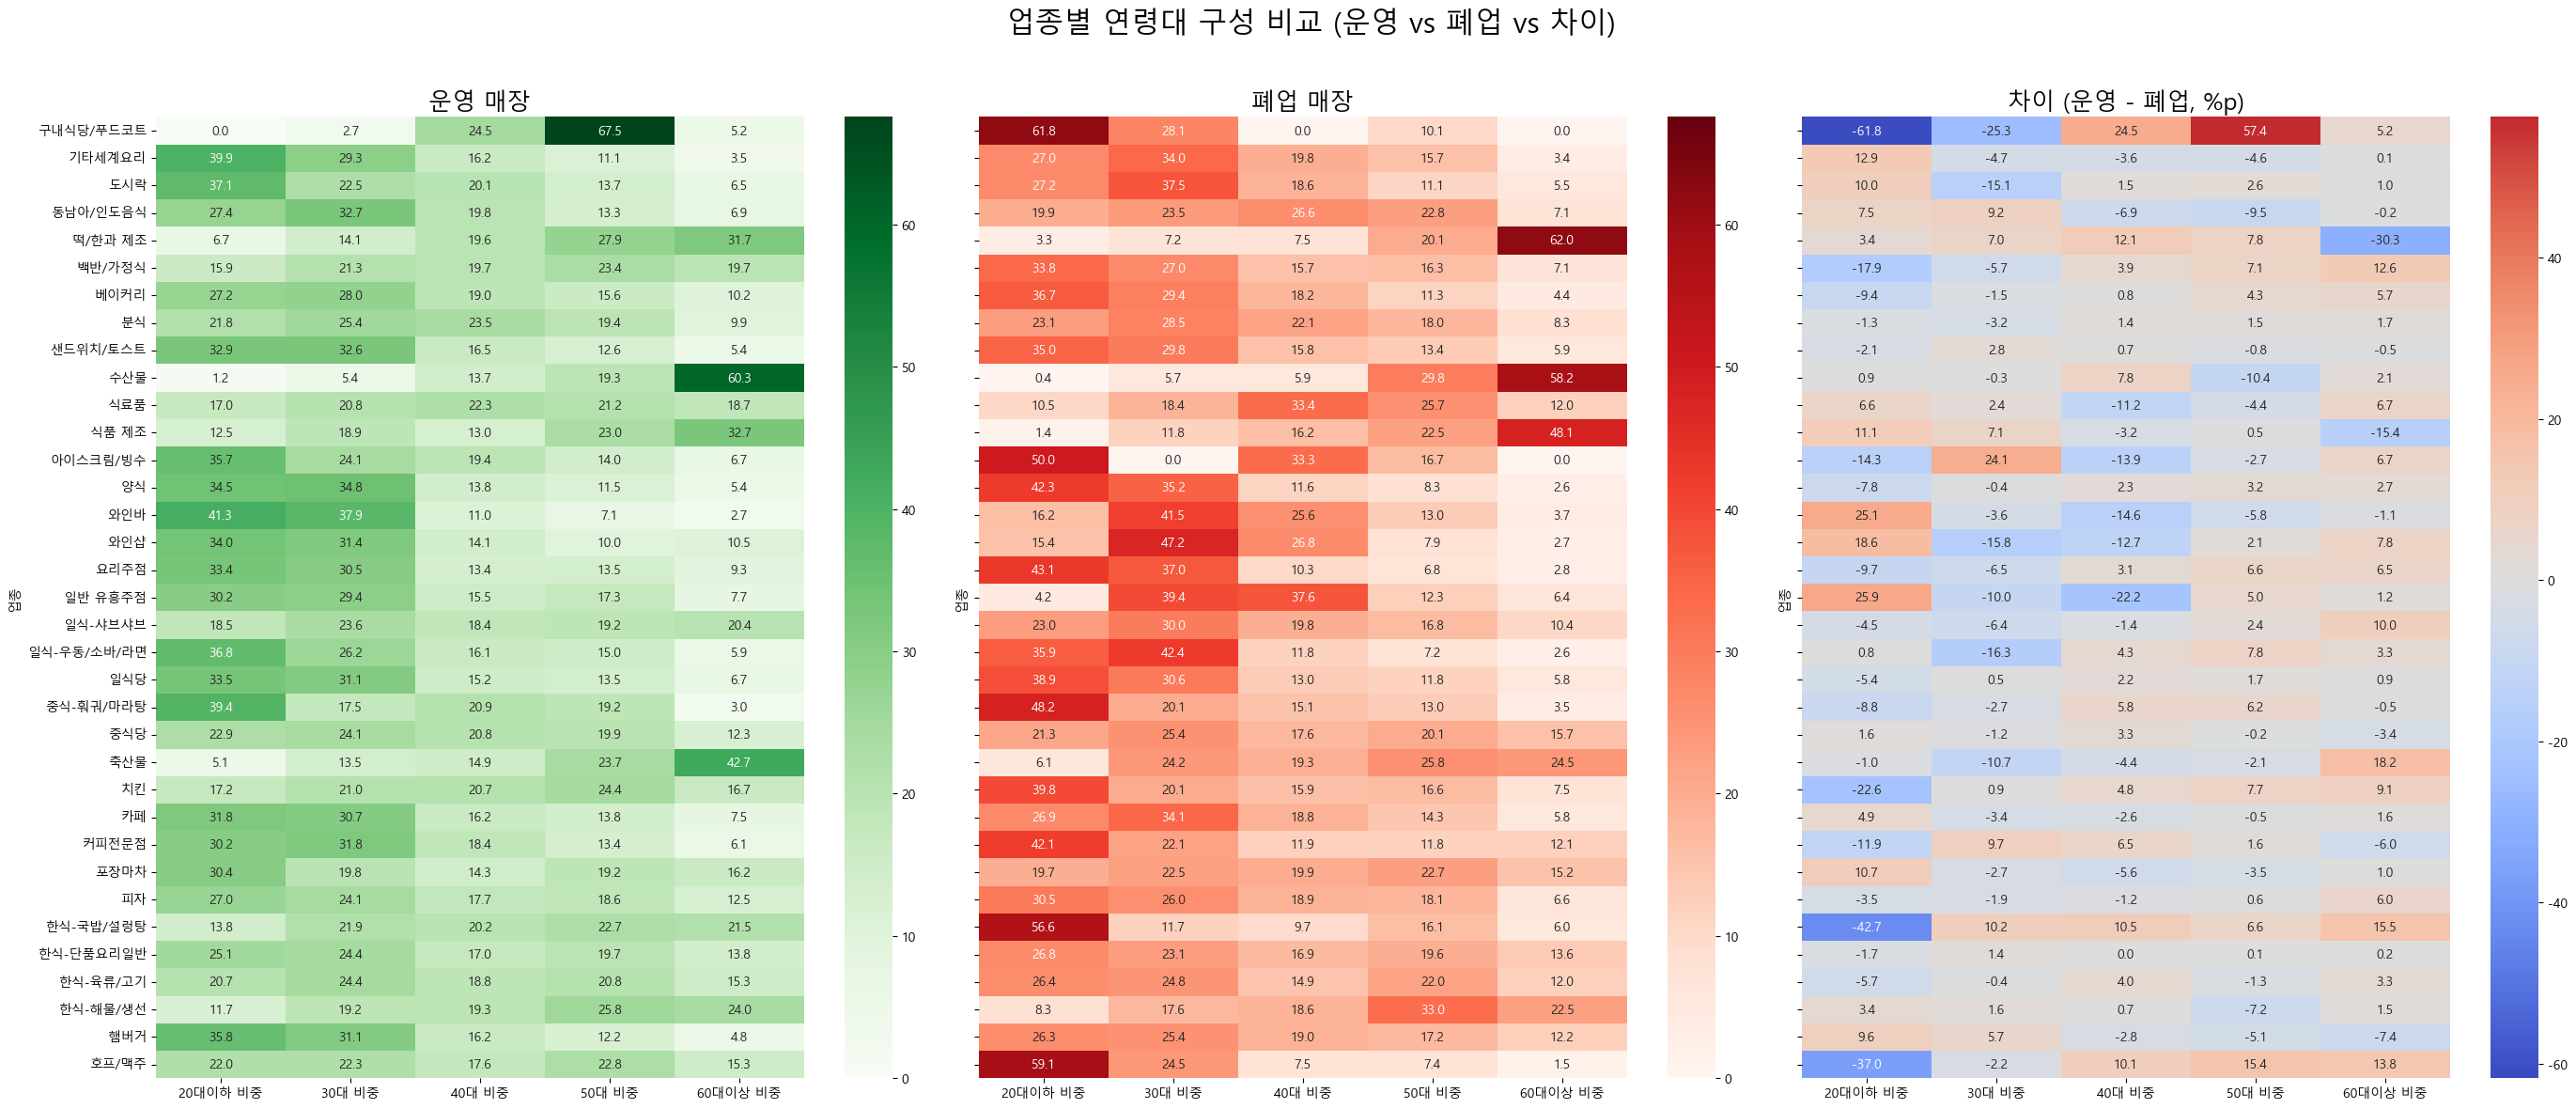

In [ ]:
age_groups = ['20대이하', '30대', '40대', '50대', '60대이상']
for age in age_groups:
    # 남성과 여성 비중을 합쳐서 'OO대 비중' 컬럼을 만듦
    df_merged[f'{age} 비중'] = df_merged[f'남성 {age} 고객 비중'] + df_merged[f'여성 {age} 고객 비중']
# ==============================================================================


# --- 1단계: 데이터 준비 및 집계 ---
age_cols = ['20대이하 비중', '30대 비중', '40대 비중', '50대 비중', '60대이상 비중']

active_industries = set(df_merged[df_merged['구분'] == '운영']['업종'].unique())
closed_industries = set(df_merged[df_merged['구분'] == '폐업']['업종'].unique())
common_industries = list(active_industries.intersection(closed_industries))
df_common = df_merged[df_merged['업종'].isin(common_industries)]

summary = df_common.groupby(['업종', '구분'])[age_cols].mean()

active_summary = summary.loc[(slice(None), '운영'), :].droplevel('구분')
closed_summary = summary.loc[(slice(None), '폐업'), :].droplevel('구분')

diff_summary = active_summary.subtract(closed_summary, fill_value=0)


# --- 2단계: 시각화  ---
all_values = pd.concat([active_summary, closed_summary])
vmin = all_values.min().min()
vmax = all_values.max().max()

fig, axes = plt.subplots(1, 3, figsize=(28, 12), sharey=True)
fig.suptitle('업종별 연령대 구성 비교 (운영 vs 폐업 vs 차이)', fontsize=22)

sns.heatmap(active_summary, annot=True, fmt='.1f', cmap='Greens', ax=axes[0], vmin=vmin, vmax=vmax)
axes[0].set_title('운영 매장', fontsize=18)

sns.heatmap(closed_summary, annot=True, fmt='.1f', cmap='Reds', ax=axes[1], vmin=vmin, vmax=vmax)
axes[1].set_title('폐업 매장', fontsize=18)

sns.heatmap(diff_summary, annot=True, fmt='.1f', cmap='coolwarm', center=0, ax=axes[2])
axes[2].set_title('차이 (운영 - 폐업, %p)', fontsize=18)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

붉은색 칸 (양수): 운영 매장의 비중이 더 높았던 '성공 요인' 연령대.

푸른색 칸 (음수): 폐업 매장의 비중이 더 높았던 '실패 요인' 또는 '과당 경쟁' 연령대.

In [21]:
# 1. 첫 번째 조건: '재방문' + '신규' 합이 100에 가까운지 확인
sum_new_revisit = df_merged['재방문 고객 비중'] + df_merged['신규 고객 비중']
condition1 = np.isclose(sum_new_revisit, 100)

# 2. 두 번째 조건: '거주' + '직장' + '유동인구' 합이 100에 가까운지 확인
sum_customer_type = df_merged['거주 이용 고객 비율'] + df_merged['직장 이용 고객 비율'] + df_merged['유동인구 이용 고객 비율']
condition2 = np.isclose(sum_customer_type, 100)

# 3. 두 조건을 모두(&) 만족하는 데이터만 추출
# .copy()를 사용해 새로운 데이터프레임을 만듦
df_filtered = df_merged[condition1 & condition2].copy()


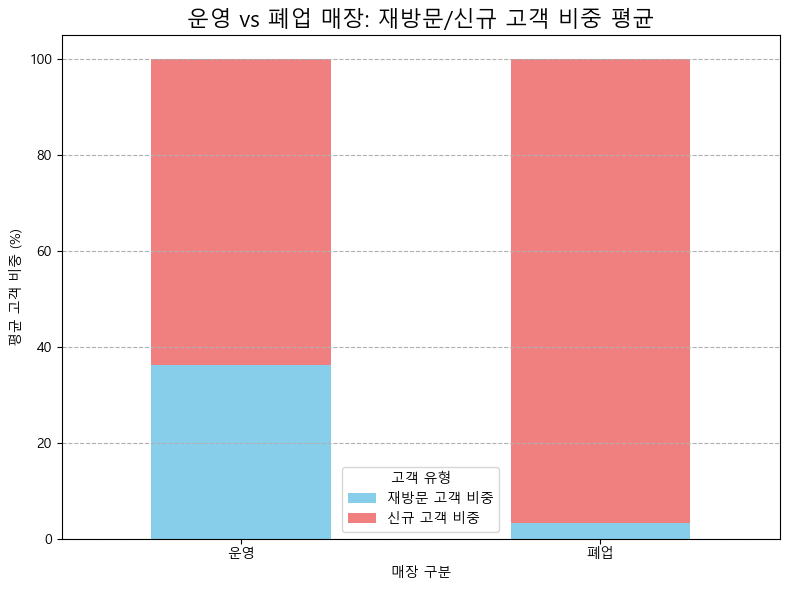

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # pandas import 확인
import numpy as np  # numpy import 확인

# 한글 폰트 및 마이너스 부호 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False



# --- 1. 데이터 집계: 재방문/신규 고객 비중 ---
# '구분'별로 '재방문 고객 비중'과 '신규 고객 비중'의 평균을 계산
revisit_new_summary = df_filtered.groupby('구분')[['재방문 고객 비중', '신규 고객 비중']].mean()

# --- 2. 시각화: 재방문/신규 고객 비중 ---
revisit_new_summary.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8, 6), 
    color=['skyblue', 'lightcoral']
)
plt.title('운영 vs 폐업 매장: 재방문/신규 고객 비중 평균', fontsize=16)
plt.ylabel('평균 고객 비중 (%)')
plt.xlabel('매장 구분')
plt.xticks(rotation=0)
plt.legend(title='고객 유형')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

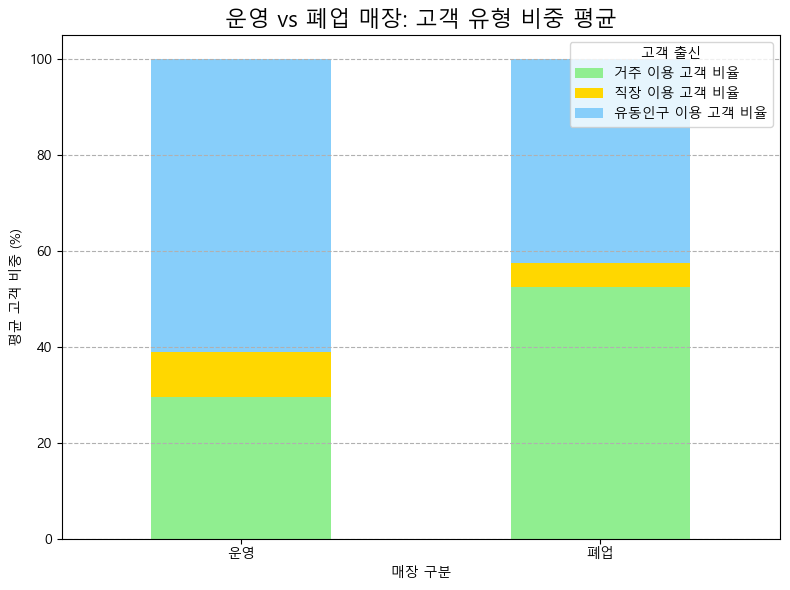

In [23]:
# --- 1. 데이터 집계: 고객 유형 비중 ---
# '구분'별로 '거주 이용 고객 비율', '직장 이용 고객 비율', '유동인구 이용 고객 비율'의 평균 계산
customer_type_summary = df_filtered.groupby('구분')[['거주 이용 고객 비율', '직장 이용 고객 비율', '유동인구 이용 고객 비율']].mean()

# --- 2. 시각화: 고객 유형 비중 ---
customer_type_summary.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8, 6), 
    color=['lightgreen', 'gold', 'lightskyblue']
)
plt.title('운영 vs 폐업 매장: 고객 유형 비중 평균', fontsize=16)
plt.ylabel('평균 고객 비중 (%)')
plt.xlabel('매장 구분')
plt.xticks(rotation=0)
plt.legend(title='고객 출신')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [24]:
df_info.to_csv('./data/df_info2.csv', encoding='utf-8-sig', index=False)

df_sales.to_csv('./data/df_sales2.csv', encoding='utf-8-sig', index=False)

df_customer.to_csv('./data/df_customer2.csv', encoding='utf-8-sig', index=False)
